# Projeto CODU/SNS 24

## Apresentação

O projeto que vamos agora detalhar foi efetuado sob orientação do formador Diogo Barros no âmbito do curso de "Fundamentos SQL, Transformação e Análise Avançada de Dados" e durante as UFCDs de Transformação de Dados e Análise Avançada de Dados.


Este projeto foi efetuado pelos formandos: 
- Filipe Ribeiro
- Sérgio Teixeira
- Viviane Lopes

A escolha do tema pretendeu intercruzar as áreas profissionais dos formandos: saúde e callcenter.

## Introdução

Em Portugal, a gestão de situações de emergência e a orientação médica desempenham um papel crucial na saúde pública. O Centro de Orientação de Doentes Urgentes (CODU) e o Serviço Nacional de Saúde 24 (SNS 24) são pilares nesse sistema e oferecem o suporte essencial para lidar com urgências e emergências de forma eficaz.

O CODU, por um lado, coordena o atendimento a casos urgentes, ajudando a otimizar a resposta das equipas de emergência e garantindo que os pacientes recebam o cuidado adequado no momento certo. O SNS 24, por outro lado, oferece orientação médica por telefone, 24 horas por dia, ajudando a filtrar e direcionar casos com base na gravidade e nas necessidades específicas dos doentes.

Este projeto tem como objetivo analisar os dados relacionados com estes serviços para entender melhor o seu funcionamento e eficácia. Vamos investigar vários aspetos, como os tempos de resposta, as chamadas recebidas, e a satisfação dos utentes com o serviço telefónico. Com esta análise, pretendemos identificar padrões e áreas que possam ser melhoradas, com o intuito de tornar esses serviços ainda mais eficientes e eficazes.

Não despiciente é o impacto que a pandemia de COVID-19 teve nestes sistemas e nas suas respostas. Para efetuar estas análises teremos também em conta a evolução da pandemia em Portugal e tentaremos tirar conclusões ds impactos que a mesma teve nos serviços.

O objetivo do projeto é assim oferecer uma visão clara e detalhada sobre o desempenho do CODU e do SNS 24, para ajudar na tomada de decisões e na implementação de melhorias que beneficiem o sistema de saúde como um todo. Através desta análise, esperamos contribuir para um atendimento mais rápido e melhor dirigido, refletindo diretamente na qualidade dos cuidados oferecidos à população.

## Bibliotecas

Vamos iniciar o código do projeto com as bibliotecas que vamos necessitar para a análise de dados. 

A matplotlib.pyplot é essencial para criar gráficos, traduzindo-se numa interface simples para a visualização de dados. A pandas é fundamental para a manipulação e análise de dados, permitindo operações eficientes com estruturas como DataFrame. O numpy complementa as anteriores com as suas capacidades de cálculo numérico e operações matemáticas avançadas. Para análise estatística, o scipy.stats fornece a função pearsonr, que mede a correlação entre variáveis. A formatação dos eixos dos gráficos é aprimorada com ScalarFormatter e FuncFormatter do módulo matplotlib.ticker, enquanto o módulo matplotlib.dates facilita a manipulação e formatação de datas em gráficos. 

Juntas, estas ferramentas permitem uma análise abrangente e visualização clara de conjuntos de dados complexos. 

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from matplotlib.ticker import ScalarFormatter
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

## Datasets

Os dados utilizados neste projeto foram obtidos de fontes oficiais e bem estabelecidas. 

Os conjuntos de dados sobre o Centro de Orientação de Doentes Urgentes (CODU) e o Serviço Nacional de Saúde 24 (SNS 24) foram extraídos de arquivos CSV disponíveis no Portal da Transparência do SNS, que fornece uma visão clara e acessível sobre esses serviços. Para os dados relacionados ao COVID-19, recorremos ao Portal da Direção-Geral da Saúde (DGS), que oferece informações detalhadas e atualizadas sobre a pandemia. 

Ambos os portais são fontes confiáveis que asseguram a precisão e a relevância das informações utilizadas para nossa análise.

In [11]:
chamadas_codu = pd.read_csv('atividade-gripe-inem.csv')
# satisfacao_codu = pd.read_csv('CSV/satisfacao-do-utente-em-atendimento-telefonico.csv')
transferencias_sns24 = pd.read_csv('sns24.csv')
atividade_sns24 = pd.read_csv('atividade-operacional-do-sns-24.csv')
# inscritos_sns24 = pd.read_csv('CSV/inscritos-na-area-pessoal-do-sns24.csv')
dados_covid = pd.read_csv('covid_dados_20240726.csv')

Uma vez que os ficheiros satisfacao_codu e inscritos_sns estão com problemas, vamos para já efetuar uma análise dos ficheiros para que possamos detetar a causa dos mesmos:

In [13]:
# Carregar e exibir as primeiras linhas do primeiro arquivo
file_path = 'satisfacao-do-utente-em-atendimento-telefonico.csv'
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Exibir as primeiras linhas para inspeção
for i, line in enumerate(lines[:5]):
    print(f"Line {i+1}: {line.strip()}")

# Carregar e exibir as primeiras linhas do segundo arquivo
file_path = 'inscritos-na-area-pessoal-do-sns24.csv'
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Exibir as primeiras linhas para inspeção
for i, line in enumerate(lines[:5]):
    print(f"Line {i+1}: {line.strip()}")

Line 1: ﻿Período;Pergunta;% Não sabe/Não se aplica;% Inquiridos com Satisfação Excelente;% Inquiridos Muito Satisfeitos;% Inquiridos Satisfeitos;% Inquiridos Insatisfeitos;% Inquiridos Muito Insatisfeitos
Line 2: 2013-01;Relação à competência e profissionalismo da equipa que assistiu;14.102564102564102;43.58974358974359;30.76923076923077;8.974358974358974;1.282051282051282;1.282051282051282
Line 3: 2013-01;Relação ao desempenho global da equipa que assistiu;15.384615384615385;47.43589743589743;26.923076923076923;7.6923076923076925;1.282051282051282;1.282051282051282
Line 4: 2013-02;Relação à atenção e disponibilidade pelo operador;20.967741935483872;48.38709677419355;14.516129032258066;8.064516129032258;4.838709677419355;3.225806451612903
Line 5: 2013-02;Relação ao desempenho global do operador;20.967741935483872;46.774193548387096;20.967741935483872;6.451612903225806;1.6129032258064515;3.225806451612903
Line 1: ﻿Período;Região;Entidade;Número de Novos Registos
Line 2: 2024-07-15;ARS N

Pela análise das primeiras 5 linhas percebe-se que o delimitador do arquivo CSV é o ; e não a , pelo que faremos a correção de ambos os arquivos do dataset.

In [18]:
inscritos_sns24 = pd.read_csv("inscritos-na-area-pessoal-do-sns24.csv", delimiter=';')
satisfacao_codu = pd.read_csv('satisfacao-do-utente-em-atendimento-telefonico.csv', delimiter=';')


## Análise Exploratória do Dataset

Para que possamos visualizar os dados que estão a ser carregados vamos efetuar um head() para uma análise às primeiras linhas e  para que seja possível detetar algum erro que  exista com os datasets importados. 

In [22]:
chamadas_codu.head()

,Período;N º de chamadas de emergência atendidas
0,2014-09-29;3732.0
1,2014-10-08;3447.0
2,2014-10-09;3454.0
3,2014-10-10;3690.0
4,2014-10-11;3374.0


In [24]:
satisfacao_codu.head()

,Período,Pergunta,% Não sabe/Não se aplica,% Inquiridos com Satisfação Excelente,% Inquiridos Muito Satisfeitos,% Inquiridos Satisfeitos,% Inquiridos Insatisfeitos,% Inquiridos Muito Insatisfeitos
0,2013-01,Relação à competência e profissionalismo da eq...,14.102564,43.589744,30.769231,8.974359,1.282051,1.282051
1,2013-01,Relação ao desempenho global da equipa que ass...,15.384615,47.435897,26.923077,7.692308,1.282051,1.282051
2,2013-02,Relação à atenção e disponibilidade pelo operador,20.967742,48.387097,14.516129,8.064516,4.838710,3.225806
3,2013-02,Relação ao desempenho global do operador,20.967742,46.774194,20.967742,6.451613,1.612903,3.225806
4,2013-04,Relação à atenção e disponibilidade pelo operador,6.153846,46.153846,30.769231,12.307692,4.615385,0.000000


In [26]:
transferencias_sns24.head()

,Período;Nº Chamadas de Emergência Transferidas para a Saúde 24
0,2012-02;6557
1,2012-11;1457
2,2013-02;3171
3,2013-03;3532
4,2013-07;4317


In [28]:
atividade_sns24.head()

,﻿Período;Indicador;Valor;Ordem
0,2021-01;Chamadas aconselhamento: Profissionais...
1,2021-01;Chamadas atendidas no SNS 24 via iLGP;...
2,2021-01;Chamadas Atendidas;1094748.0;72
3,2021-01;Taxa Atendimento revista (%);81.78;70
4,2021-01;Chamadas Recebidas;1432857.0;73


In [30]:
inscritos_sns24.head()

,Período,Região,Entidade,Número de Novos Registos
0,2024-07-15,ARS Norte,ACES Alto Trás-os-Montes - Nordeste,19
1,2024-07-16,ARS Norte,ACES Alto Trás-os-Montes - Nordeste,20
2,2024-07-18,ARS Norte,ACES Alto Trás-os-Montes - Nordeste,6
3,2024-07-12,ARS Norte,ACES Ave / Famalicão,26
4,2024-07-20,ARS Norte,ACES Ave / Famalicão,10


Verifica-se que a maioria das tabelas não está a ser lida corretamente. Apenas as variáveis cuja alteração do delimitador foi aplicada, as variáveis inscritos_sns24 e satisfacao_codu, estão a ser lidas corretamente. Vamos aplicar o mesmo a todas as variáveis que vamos necessitar:

In [33]:
chamadas_codu = pd.read_csv('atividade-gripe-inem.csv', delimiter=';')
satisfacao_codu = pd.read_csv('satisfacao-do-utente-em-atendimento-telefonico.csv', delimiter=';')
transferencias_sns24 = pd.read_csv('sns24.csv', delimiter=';')
atividade_sns24 = pd.read_csv('atividade-operacional-do-sns-24.csv', delimiter=';')
inscritos_sns24 = pd.read_csv('inscritos-na-area-pessoal-do-sns24.csv', delimiter=';')
dados_covid = pd.read_csv('covid_dados_20240726.csv', delimiter=';')

In [35]:
chamadas_codu.head()

,Período,N º de chamadas de emergência atendidas
0,2014-09-29,3732.0
1,2014-10-08,3447.0
2,2014-10-09,3454.0
3,2014-10-10,3690.0
4,2014-10-11,3374.0


In [37]:
satisfacao_codu.head()

,Período,Pergunta,% Não sabe/Não se aplica,% Inquiridos com Satisfação Excelente,% Inquiridos Muito Satisfeitos,% Inquiridos Satisfeitos,% Inquiridos Insatisfeitos,% Inquiridos Muito Insatisfeitos
0,2013-01,Relação à competência e profissionalismo da eq...,14.102564,43.589744,30.769231,8.974359,1.282051,1.282051
1,2013-01,Relação ao desempenho global da equipa que ass...,15.384615,47.435897,26.923077,7.692308,1.282051,1.282051
2,2013-02,Relação à atenção e disponibilidade pelo operador,20.967742,48.387097,14.516129,8.064516,4.838710,3.225806
3,2013-02,Relação ao desempenho global do operador,20.967742,46.774194,20.967742,6.451613,1.612903,3.225806
4,2013-04,Relação à atenção e disponibilidade pelo operador,6.153846,46.153846,30.769231,12.307692,4.615385,0.000000


In [39]:
transferencias_sns24.head()

,Período,Nº Chamadas de Emergência Transferidas para a Saúde 24
0,2012-02,6557
1,2012-11,1457
2,2013-02,3171
3,2013-03,3532
4,2013-07,4317


In [41]:
atividade_sns24.head(8)

,﻿Período,Indicador,Valor,Ordem
0,2021-01,Chamadas aconselhamento: Profissionais de saúde,523.00,67
1,2021-01,Chamadas atendidas no SNS 24 via iLGP,238.00,66
2,2021-01,Chamadas Atendidas,1094748.00,72
3,2021-01,Taxa Atendimento revista (%),81.78,70
4,2021-01,Chamadas Recebidas,1432857.00,73
5,2021-01,Tempo Médio de Espera (seg),503.00,69
6,2021-01,Chamadas aconselhamento: Utentes,6174.00,68
7,2020-04,Chamadas Atendidas,271487.00,6


Pela análise efetuada conseguimos apurar desde já a necessidade de criar uma pivot table na variável atividade_sns24 com cada um dos indicadores em colunas distintas.

In [44]:
inscritos_sns24.head()

,Período,Região,Entidade,Número de Novos Registos
0,2024-07-15,ARS Norte,ACES Alto Trás-os-Montes - Nordeste,19
1,2024-07-16,ARS Norte,ACES Alto Trás-os-Montes - Nordeste,20
2,2024-07-18,ARS Norte,ACES Alto Trás-os-Montes - Nordeste,6
3,2024-07-12,ARS Norte,ACES Ave / Famalicão,26
4,2024-07-20,ARS Norte,ACES Ave / Famalicão,10


In [46]:
print(chamadas_codu.dtypes)
print("")
print(satisfacao_codu.dtypes)
print("")
print(transferencias_sns24.dtypes)
print("")
print(atividade_sns24.dtypes)
print("")
print(inscritos_sns24.dtypes)

Período                                     object
N º de chamadas de emergência atendidas    float64
dtype: object

Período                                   object
Pergunta                                  object
% Não sabe/Não se aplica                 float64
% Inquiridos com Satisfação Excelente    float64
% Inquiridos Muito Satisfeitos           float64
% Inquiridos Satisfeitos                 float64
% Inquiridos Insatisfeitos               float64
% Inquiridos Muito Insatisfeitos         float64
dtype: object

Período                                                   object
Nº Chamadas de Emergência Transferidas para a Saúde 24     int64
dtype: object

﻿Período      object
Indicador     object
Valor        float64
Ordem          int64
dtype: object

Período                     object
Região                      object
Entidade                    object
Número de Novos Registos     int64
dtype: object


In [48]:
dados_covid.head()

,confirmation_date1,day_cum_abs_num,day_ob_abs_num
0,04/03/2020,1,NaN
1,05/03/2020,3,NaN
2,06/03/2020,6,NaN
3,07/03/2020,7,NaN
4,08/03/2020,7,NaN


A variável day_ob_abs_num poderá trazer problemas posteriores uma vez que a mesma tem valores nulos. Vamos analisar este problema mais à frente. 

Após verificarmos que os dados estão a ser corretamente carregados no dataset, vamos avançar para a fase de transformação de dados.

## Transformação de dados

Em primeiro lugar será necessário converter as colunas de data (Período) para o formato correto period e não object. Vamos começar com essa alteração abaixo:

### chamadas_codu

In [55]:
chamadas_codu['Período'] = pd.to_datetime(chamadas_codu['Período'], format='%Y-%m-%d').dt.to_period('M')
chamadas_codu = chamadas_codu.groupby('Período').sum().reset_index()
chamadas_codu['N º de chamadas de emergência atendidas'] = chamadas_codu['N º de chamadas de emergência atendidas'].round().astype('int64')

print(chamadas_codu.dtypes)
print("")
chamadas_codu.head()

Período                                    period[M]
N º de chamadas de emergência atendidas        int64
dtype: object



,Período,N º de chamadas de emergência atendidas
0,2012-01,98366
1,2012-02,106837
2,2012-03,101028
3,2012-04,84741
4,2012-05,96249


### satisfacao_codu

In [58]:
satisfacao_codu['Período'] = pd.to_datetime(satisfacao_codu['Período'], format='%Y-%m').dt.to_period('M')
print(satisfacao_codu.dtypes)
print("")
satisfacao_codu.head()

Período                                  period[M]
Pergunta                                    object
% Não sabe/Não se aplica                   float64
% Inquiridos com Satisfação Excelente      float64
% Inquiridos Muito Satisfeitos             float64
% Inquiridos Satisfeitos                   float64
% Inquiridos Insatisfeitos                 float64
% Inquiridos Muito Insatisfeitos           float64
dtype: object



,Período,Pergunta,% Não sabe/Não se aplica,% Inquiridos com Satisfação Excelente,% Inquiridos Muito Satisfeitos,% Inquiridos Satisfeitos,% Inquiridos Insatisfeitos,% Inquiridos Muito Insatisfeitos
0,2013-01,Relação à competência e profissionalismo da eq...,14.102564,43.589744,30.769231,8.974359,1.282051,1.282051
1,2013-01,Relação ao desempenho global da equipa que ass...,15.384615,47.435897,26.923077,7.692308,1.282051,1.282051
2,2013-02,Relação à atenção e disponibilidade pelo operador,20.967742,48.387097,14.516129,8.064516,4.838710,3.225806
3,2013-02,Relação ao desempenho global do operador,20.967742,46.774194,20.967742,6.451613,1.612903,3.225806
4,2013-04,Relação à atenção e disponibilidade pelo operador,6.153846,46.153846,30.769231,12.307692,4.615385,0.000000


Para Análise das questões colocadas decidimos aplicar a metodologia do Net Promoter Scope e foi efetuado o seguimte agrupamento:
Excelente e Muito satisfeito: Promotores
Satisfeito: Passivos
Insatisfeito e Muito Insatisfito: Detratores

In [61]:
# Adiciona a coluna 'Promotores'
satisfacao_codu['Promotores'] = (satisfacao_codu['% Inquiridos com Satisfação Excelente'] +
                                  satisfacao_codu['% Inquiridos Muito Satisfeitos'])

# Adiciona a coluna 'Passivos'
satisfacao_codu['Passivos'] = satisfacao_codu['% Inquiridos Satisfeitos']

# Adiciona a coluna 'Detratores'
satisfacao_codu['Detratores'] = (satisfacao_codu['% Inquiridos Insatisfeitos'] +
                                  satisfacao_codu['% Inquiridos Muito Insatisfeitos'])

# Exibe as primeiras linhas do DataFrame para verificar as novas colunas
print(satisfacao_codu.head())

   Período                                           Pergunta  \
0  2013-01  Relação à competência e profissionalismo da eq...   
1  2013-01  Relação ao desempenho global da equipa que ass...   
2  2013-02  Relação à atenção e disponibilidade pelo operador   
3  2013-02           Relação ao desempenho global do operador   
4  2013-04  Relação à atenção e disponibilidade pelo operador   

   % Não sabe/Não se aplica  % Inquiridos com Satisfação Excelente  \
0                 14.102564                              43.589744   
1                 15.384615                              47.435897   
2                 20.967742                              48.387097   
3                 20.967742                              46.774194   
4                  6.153846                              46.153846   

   % Inquiridos Muito Satisfeitos  % Inquiridos Satisfeitos  \
0                       30.769231                  8.974359   
1                       26.923077                  7.692308   

Vamos criar novas variáveis para cada uma das questões a ser estudadas:

In [64]:
desempenho_operador = satisfacao_codu[satisfacao_codu['Pergunta'] == 'Relação ao desempenho global do operador']

print(desempenho_operador.head())

    Período                                  Pergunta  \
3   2013-02  Relação ao desempenho global do operador   
8   2013-06  Relação ao desempenho global do operador   
33  2014-05  Relação ao desempenho global do operador   
35  2014-06  Relação ao desempenho global do operador   
52  2015-07  Relação ao desempenho global do operador   

    % Não sabe/Não se aplica  % Inquiridos com Satisfação Excelente  \
3                  20.967742                              46.774194   
8                   5.194805                              40.259740   
33                  7.317073                              59.756098   
35                  8.771930                              43.859649   
52                 23.080000                              51.920000   

    % Inquiridos Muito Satisfeitos  % Inquiridos Satisfeitos  \
3                        20.967742                  6.451613   
8                        41.558442                  6.493506   
33                       29.268293    

### transferencias_sns24

In [67]:
transferencias_sns24['Período'] = pd.to_datetime(transferencias_sns24['Período'], format='%Y-%m').dt.to_period('M')


print(transferencias_sns24.dtypes)
print("")
transferencias_sns24.head()

Período                                                   period[M]
Nº Chamadas de Emergência Transferidas para a Saúde 24        int64
dtype: object



,Período,Nº Chamadas de Emergência Transferidas para a Saúde 24
0,2012-02,6557
1,2012-11,1457
2,2013-02,3171
3,2013-03,3532
4,2013-07,4317


### atividade_sns24 -> atividade_sns24_pivot

Como tínhamos já antevido, será necessário efetuar uma pivot table na variável atividade_sns24 pelo que vamos criar a nova variável atividade_sns24_pivot:

In [71]:
# Rename the column to remove any hidden characters and facilitate access
atividade_sns24.rename(columns=lambda x: x.strip(), inplace=True)
atividade_sns24.rename(columns={'﻿Período': 'Periodo'}, inplace=True)

# Pivot the table to get indicators in columns and periods in rows
atividade_sns24_pivot = atividade_sns24.pivot(index='Periodo', columns='Indicador', values='Valor')
atividade_sns24_pivot.reset_index(inplace=True)

# Convert the 'Periodo' column to Period type (year and month)
atividade_sns24_pivot['Periodo'] = pd.to_datetime(atividade_sns24_pivot['Periodo'], format='%Y-%m').dt.to_period('M')

# Convert percentage columns to float64
atividade_sns24_pivot['Taxa Atendimento (%)'] = atividade_sns24_pivot['Taxa Atendimento (%)'].astype('float64')
atividade_sns24_pivot['Taxa Atendimento revista (%)'] = atividade_sns24_pivot['Taxa Atendimento revista (%)'].astype('float64')

# Convert other columns to int64
cols_to_int64 = [
    'Chamadas Atendidas',
    'Chamadas Recebidas',
    'Chamadas aconselhamento: Profissionais de saúde',
    'Chamadas aconselhamento: Utentes',
    'Chamadas atendidas no SNS 24 via iLGP',
    'Tempo Médio de Espera (seg)'
]

atividade_sns24_pivot[cols_to_int64] = atividade_sns24_pivot[cols_to_int64].astype('int64')

print(atividade_sns24_pivot.dtypes)
print("")
atividade_sns24_pivot.head()


Indicador
Periodo                                            period[M]
Chamadas Atendidas                                     int64
Chamadas Recebidas                                     int64
Chamadas aconselhamento: Profissionais de saúde        int64
Chamadas aconselhamento: Utentes                       int64
Chamadas atendidas no SNS 24 via iLGP                  int64
Taxa Atendimento (%)                                 float64
Taxa Atendimento revista (%)                         float64
Tempo Médio de Espera (seg)                            int64
dtype: object



Indicador,Periodo,Chamadas Atendidas,Chamadas Recebidas,Chamadas aconselhamento: Profissionais de saúde,Chamadas aconselhamento: Utentes,Chamadas atendidas no SNS 24 via iLGP,Taxa Atendimento (%),Taxa Atendimento revista (%),Tempo Médio de Espera (seg)
0,2020-04,271487,274680,770,6237,29,98.84,NaN,25
1,2020-05,184857,191107,528,6074,54,96.73,NaN,22
2,2020-06,200056,204551,430,5420,118,97.80,NaN,22
3,2020-07,207368,212477,475,6209,66,97.60,NaN,22
4,2020-08,178736,181038,520,5265,52,98.73,NaN,21


In [73]:
print(atividade_sns24.columns)

Index(['Periodo', 'Indicador', 'Valor', 'Ordem'], dtype='object')


In [75]:
# Verificar se existem valores nulos no DataFrame
valores_nulos = atividade_sns24_pivot.isnull().sum()
 
# Mostrar o número de valores nulos por coluna
print(valores_nulos)

Indicador
Periodo                                            0
Chamadas Atendidas                                 0
Chamadas Recebidas                                 0
Chamadas aconselhamento: Profissionais de saúde    0
Chamadas aconselhamento: Utentes                   0
Chamadas atendidas no SNS 24 via iLGP              0
Taxa Atendimento (%)                               0
Taxa Atendimento revista (%)                       7
Tempo Médio de Espera (seg)                        0
dtype: int64


Detetámos que a Taxa de Atendimento Revista tem valores nulos desde 2020-04 até 2020-10 uma vez que este mesmo indicador não foi disponibilizado durante este período. Vamos deixar os mesmos no dataset sem ação por agora.

Por questões de conveniência da análise de dados decidimos acrescentar uma nova coluna à tabela das chamadas não atendidas, que corresponde à diferença entre as chamadas recebidas e as chamadas atendidas:

In [79]:
atividade_sns24_pivot.head()

# Adicionar a coluna de chamadas não atendidas
atividade_sns24_pivot['Chamadas Não Atendidas'] = atividade_sns24_pivot['Chamadas Recebidas'] - atividade_sns24_pivot['Chamadas Atendidas']

# Visualizar as primeiras linhas do DataFrame para verificar a nova coluna
print(atividade_sns24_pivot.head())

Indicador  Periodo  Chamadas Atendidas  Chamadas Recebidas  \
0          2020-04              271487              274680   
1          2020-05              184857              191107   
2          2020-06              200056              204551   
3          2020-07              207368              212477   
4          2020-08              178736              181038   

Indicador  Chamadas aconselhamento: Profissionais de saúde  \
0                                                      770   
1                                                      528   
2                                                      430   
3                                                      475   
4                                                      520   

Indicador  Chamadas aconselhamento: Utentes  \
0                                      6237   
1                                      6074   
2                                      5420   
3                                      6209   
4                  

### inscritos_sns24

In [82]:
inscritos_sns24['Período'] = pd.to_datetime(inscritos_sns24['Período'], format='%Y-%m-%d').dt.to_period('M')
inscritos_sns24 = inscritos_sns24.groupby('Período').sum().reset_index()

print(inscritos_sns24.dtypes)
print("")
inscritos_sns24.head()

Período                     period[M]
Região                         object
Entidade                       object
Número de Novos Registos        int64
dtype: object



,Período,Região,Entidade,Número de Novos Registos
0,2024-07,ARS NorteARS NorteARS NorteARS NorteARS NorteA...,ACES Alto Trás-os-Montes - NordesteACES Alto T...,19324


Uma vez que a variável inscritos_sns24 refere-se apenas ao mês de Julho 2024, acreditamos que a mesma não vá trazer grandes conclusões por limitação de representatividade temporal. No entanto, manteremos a mesma no dataset.

### dados_covid

Vamos alterar os nomes das colunas e manter a integridade do dataset por Mês/Ano.

In [87]:
# Renomear as colunas
dados_covid.rename(columns={'confirmation_date1': 'Período', 'day_cum_abs_num': 'Casos', 'day_ob_abs_num': 'Óbitos'}, inplace=True)

# Converter a coluna 'Período' para datetime, especificando o formato correto
dados_covid['Período'] = pd.to_datetime(dados_covid['Período'], format='%d/%m/%Y', dayfirst=True).dt.to_period('M')

# Tratar valores NaN antes da conversão
# Preencher NaN com 0
dados_covid['Óbitos'] = dados_covid['Óbitos'].fillna(0)

# Converter a coluna 'Óbitos' para int64
dados_covid['Óbitos'] = dados_covid['Óbitos'].astype('int64')

# Agrupar os dados por 'Período' e somar as colunas 'Casos' e 'Óbitos'
dados_covid = dados_covid.groupby('Período').sum().reset_index()

# Exibir as primeiras linhas do DataFrame para verificar se as colunas foram renomeadas corretamente
print(dados_covid.dtypes)
print("")
print(dados_covid.head())


Período    period[M]
Casos          int64
Óbitos         int64
dtype: object

   Período  Casos  Óbitos
0  2020-03   7210     214
1  2020-04  16834     873
2  2020-05   8695     345
3  2020-06   9982     150
4  2020-07   9377     159


## Análise de Dados

Por uma questão de conveniência desta análise faremos a mesma por cada uma das variáveis geradas a partir dos ficheiros CSV:

### dados_covid

Considerámos interessante efetuar a análise de todos os dados dos callcenters do CODU e SNS 24 tendo em conta que estes mecanismos do Serviço Nacional de Saúde foram fortemente testados durante a pandemia de COVID-19. Por isso achámos que seria interessante e útil efetuar uma rápida análise da evolução mensal e anual da pandemia, para que posteriormente possamos relacionar a mesma com os resultados obtidos. Seguem duas visualizações da variação mensal e anual de dois indicadores epidemiológicos: número de casos e número de óbitos.

#### Variação Mensal

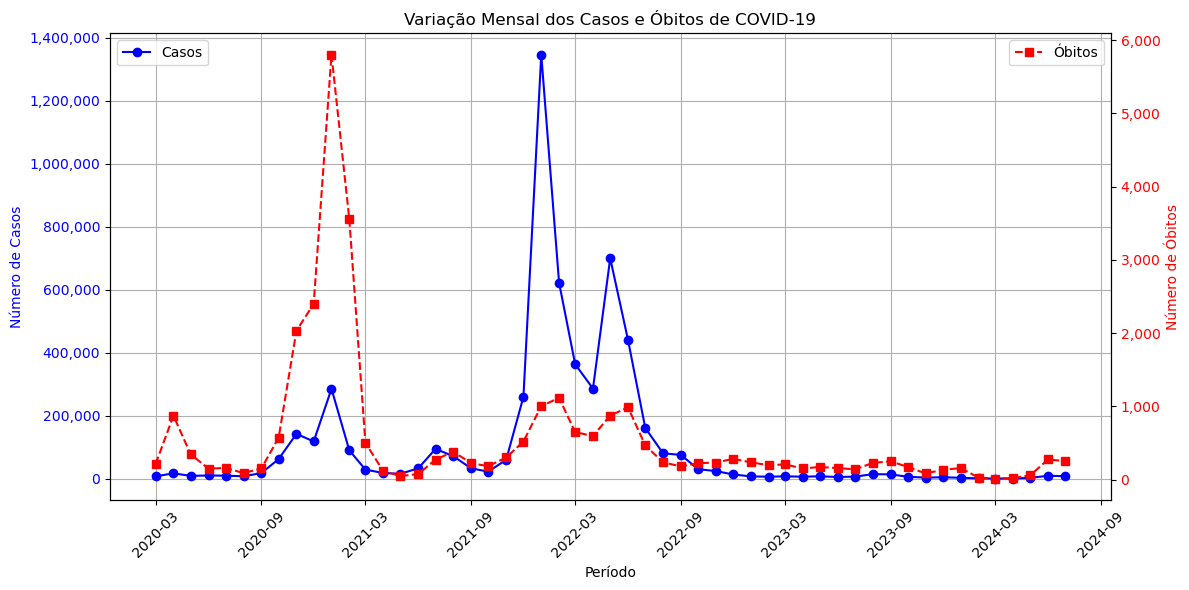

In [94]:
# Converter 'Período' de Period para timestamp
dados_covid['Período'] = dados_covid['Período'].dt.to_timestamp()

# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotar a linha para casos de COVID-19
ax1.plot(dados_covid['Período'], dados_covid['Casos'], marker='o', linestyle='-', color='b', label='Casos')
ax1.set_xlabel('Período')
ax1.set_ylabel('Número de Casos', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Remover notação científica do eixo y
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Configurar os ticks do eixo x para aparecerem de 6 em 6 meses
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Criar o segundo eixo y para os óbitos no mesmo lado
ax2 = ax1.twinx()
ax2.plot(dados_covid['Período'], dados_covid['Óbitos'], marker='s', linestyle='--', color='r', label='Óbitos')
ax2.set_ylabel('Número de Óbitos', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Remover notação científica do eixo y do segundo eixo
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Adicionar títulos e rótulos
plt.title('Variação Mensal dos Casos e Óbitos de COVID-19')

# Adicionar grade para melhor visualização
ax1.grid(True)

# Adicionar legendas para os eixos y
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

A análise destes dados permite chegar a algumas conclusões:
- Março 2020 - Início da Pandemia de COVID-19 em Portugal
- Abril 2020 - Primeiro pico de óbitos
- Janeiro 2021 - Pico de casos e pico máximo de óbitos
- Janeiro 2022 - Pico máximo de casos
- Fevereiro 2022 - Pico de óbitos
- Maio 2022 - pico de casos
- Junho 2022 - pico de óbitos
- Após estas datas existe uma estabilização no número de casos e óbitos.

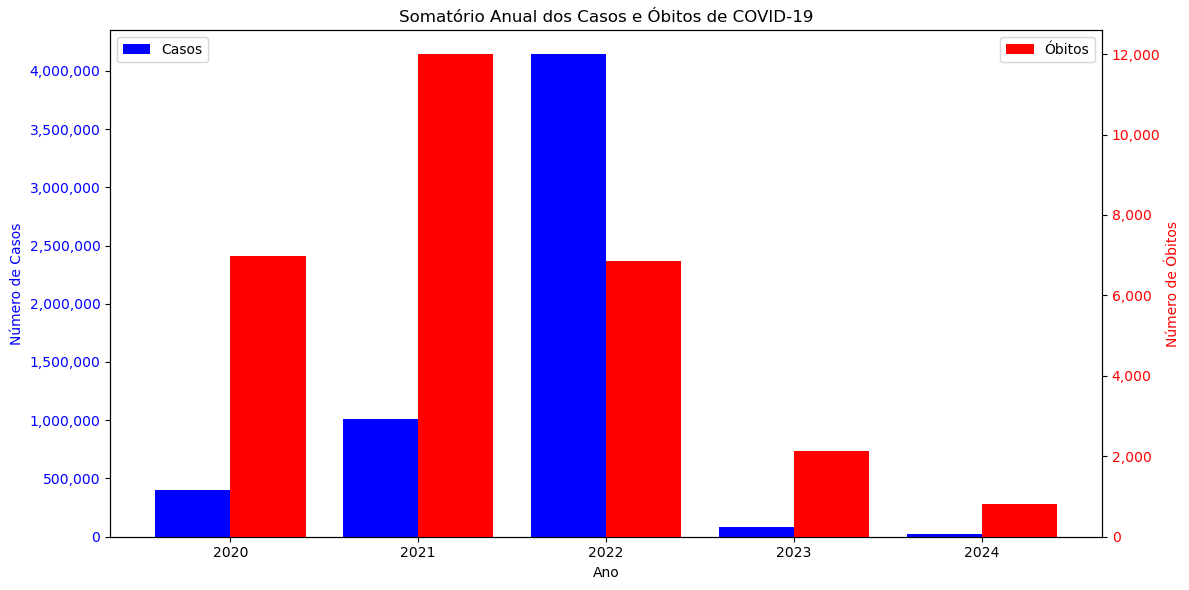

In [97]:
# Agrupar os dados por ano e calcular o somatório anual
dados_anuais = dados_covid.groupby(dados_covid['Período'].dt.year)[['Casos', 'Óbitos']].sum().reset_index()
dados_anuais.rename(columns={'Período': 'Ano'}, inplace=True)

# Criar o gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotar barras para casos de COVID-19
bar_width = 0.4
ax1.bar(dados_anuais['Ano'] - bar_width / 2, dados_anuais['Casos'], width=bar_width, color='b', label='Casos')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Número de Casos', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Remover notação científica do eixo y
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Criar o segundo eixo y para os óbitos no mesmo lado
ax2 = ax1.twinx()
ax2.bar(dados_anuais['Ano'] + bar_width / 2, dados_anuais['Óbitos'], width=bar_width, color='r', label='Óbitos')
ax2.set_ylabel('Número de Óbitos', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Remover notação científica do eixo y do segundo eixo
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Adicionar títulos e rótulos
plt.title('Somatório Anual dos Casos e Óbitos de COVID-19')

# Adicionar legendas para os eixos y
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

Este gráfico permite-nos tirar as seguintes conclusões:
- Apesar do início em 2020, este não é o ano com o máximo de casos ou óbitos.
- 2021 foi o ano com mais óbitos até agora.
- 2022 foi o ano com mais casos de covid 19 registados até ao momento.
- Os anos de 2023 e 2024 parecem mostrar uma estabilização no número de casos e óbitos.

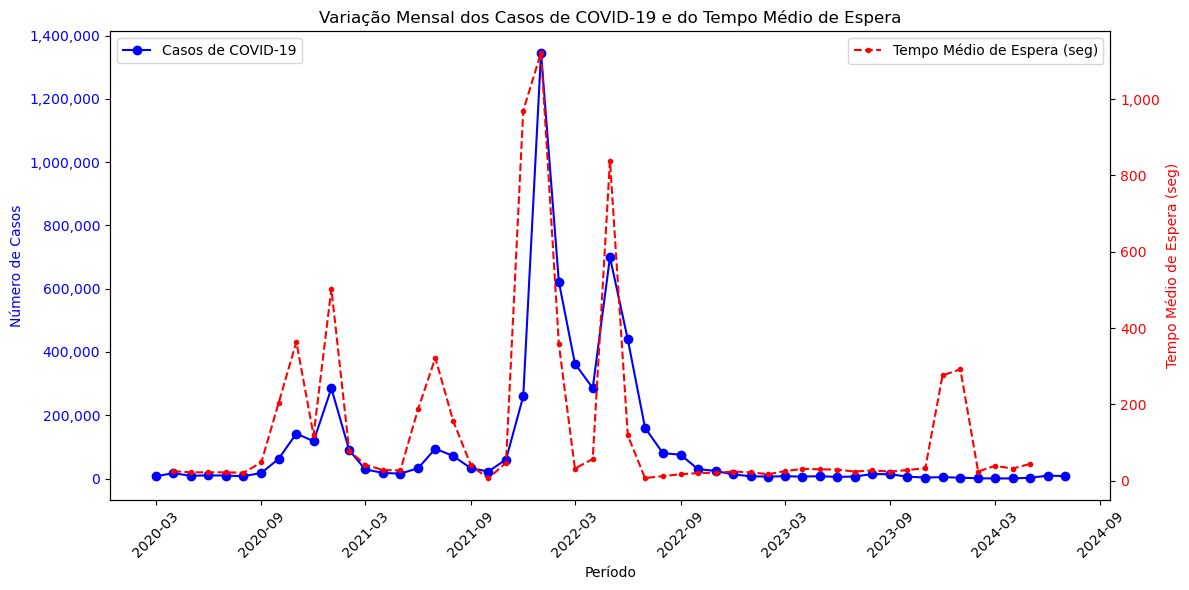

In [100]:
# Converter 'Período' para datetime
dados_covid['Período'] = pd.to_datetime(dados_covid['Período'], errors='coerce')

# Ajustar 'Periodo' de atividade_sns24_pivot para string e depois para datetime
atividade_sns24_pivot['Periodo'] = pd.to_datetime(atividade_sns24_pivot['Periodo'].astype(str), errors='coerce')

# Verificar se 'Periodo_str' existe, caso contrário, criar
if 'Periodo_str' not in atividade_sns24_pivot.columns:
    atividade_sns24_pivot['Periodo_str'] = atividade_sns24_pivot['Periodo'].astype(str)

# Criar o gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 6))

# Definir o fundo do gráfico e dos eixos como branco
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Plotar a linha para casos de COVID-19
ax1.plot(dados_covid['Período'], dados_covid['Casos'], marker='o', linestyle='-', color='b', label='Casos de COVID-19')
ax1.set_xlabel('Período')
ax1.set_ylabel('Número de Casos', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Remover notação científica do eixo y
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Configurar os ticks do eixo x para aparecerem de 6 em 6 meses
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Criar o segundo eixo y para o tempo médio de espera
ax2 = ax1.twinx()
ax2.plot(atividade_sns24_pivot['Periodo'], atividade_sns24_pivot['Tempo Médio de Espera (seg)'], marker='.', linestyle='--', color='r', label='Tempo Médio de Espera (seg)')
ax2.set_ylabel('Tempo Médio de Espera (seg)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Remover notação científica do eixo y do segundo eixo
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Adicionar título e rótulos
plt.title('Variação Mensal dos Casos de COVID-19 e do Tempo Médio de Espera')

# Adicionar grade para melhor visualização
ax1.grid(False)
ax2.grid(False)

# Adicionar legendas para os eixos y
ax1.legend(loc='upper left', facecolor='white')
ax2.legend(loc='upper right',facecolor='white')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

O gráfico acima permite inferir uma relação entre os Casos de COVID-19 e Tempo Médio de Espera na linha SNS24:
- Durante os períodos em que o número de casos de COVID-19 aumenta (picos na linha azul), o tempo médio de espera também tende a aumentar (picos na linha vermelha).
- O tempo médio de espera também varia, mas nem sempre segue exatamente os mesmos padrões dos casos, o que faz antever que não seja o único fator a provocar aumento no tempo médio de espera. 

### chamadas_codu

#### Variação Mensal das Chamadas de Emergência Atendidas

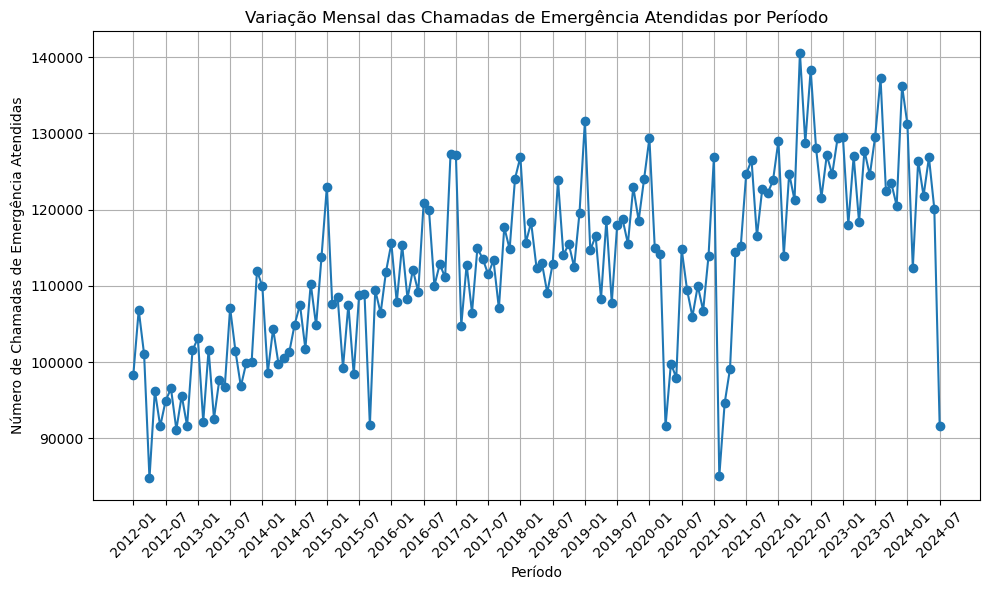

In [105]:
# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(chamadas_codu['Período'].astype(str), chamadas_codu['N º de chamadas de emergência atendidas'], marker='o')

# Adicionar títulos e rótulos
plt.title('Variação Mensal das Chamadas de Emergência Atendidas por Período')
plt.xlabel('Período')
plt.ylabel('Número de Chamadas de Emergência Atendidas')

# Configurar os ticks do eixo x para aparecerem de 3 em 3 meses
periods = chamadas_codu['Período'].astype(str)
num_periods = len(periods)
ticks = periods[::6]  # Seleciona de 3 em 3 períodos
tick_positions = range(0, num_periods, 6)  # Posições correspondentes

plt.xticks(tick_positions, ticks, rotation=45)

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


A análise do gráfico permite-nos chegar às seguites conclusões:
- Existe uma tendência geral de aumento do número de chamadas atendididas a longo do tempo
- No início do período em analise, em 2012, o número de chamadas está em torno de 90.000 a 110.000, até 2023 o número  de chamadas mensalmente atendidas aumentou para cerca de 110.000 a 130.000, com picos ocasionais.
- Existem flutuações significativas nos dados com picos observados em períodos como meados de 2015, 2016, 2019, 2022 e vales mais pronunciados em períodos como 2012, 2015, 2020 e 2021.
-No início de 2024, há uma queda acentuada no número de chamadas atendidas, muito abaixo dos totais mensais observados nos anos anteriores.
- Há uma certa sazonalidade observável no gráfico, onde certos meses do ano consistentemente apresentam picos ou quedas, sendo que se pode tabém observar que alguns meses têm tendencialmente maior número de chamadas do que outros.

### satisfacao_codu

##### Desempenho global do operador

###### Variação Mensal

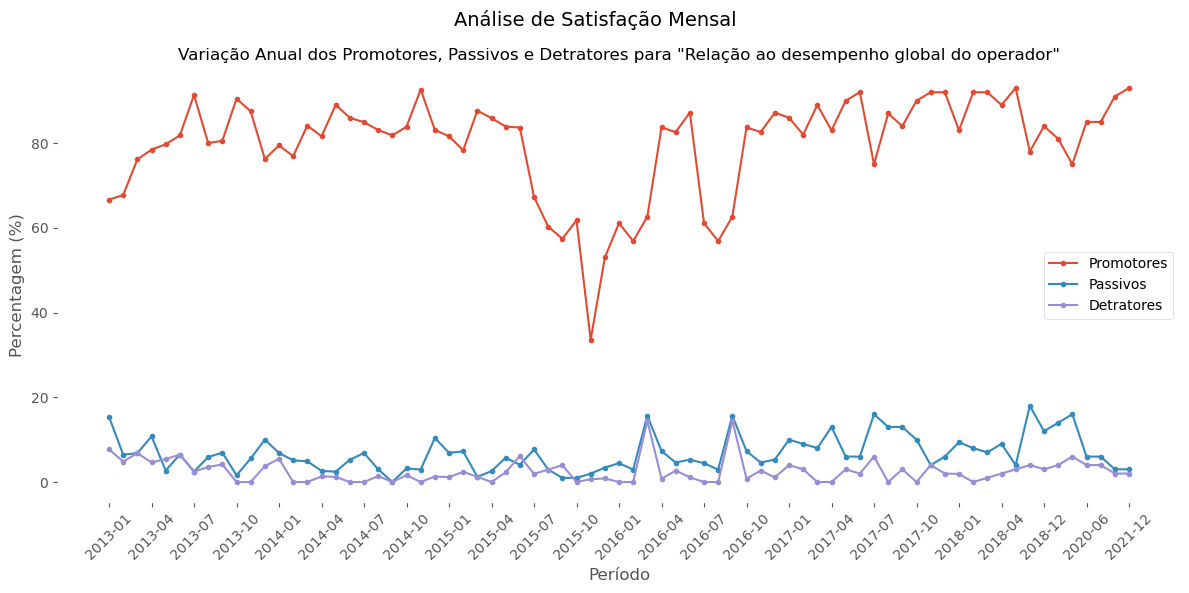

In [111]:
# Filtrar os dados para a pergunta específica
dados_filtrados = satisfacao_codu[satisfacao_codu['Pergunta'] == 'Relação ao desempenho global do operador']

# Ordenar os dados pelo período para garantir a correta visualização temporal
dados_filtrados = dados_filtrados.sort_values(by='Período')

# Define a coluna de período como o índice do DataFrame
dados_filtrados.set_index('Período', inplace=True)

# Converte o índice Period para strings para compatibilidade com Matplotlib
dados_filtrados.index = dados_filtrados.index.astype(str)

# Configura o estilo do gráfico (opcional)
plt.style.use('ggplot')  # Usando um estilo válido como exemplo

# Cria o gráfico
plt.figure(figsize=(12, 6))

# Plota cada linha
plt.plot(dados_filtrados.index, dados_filtrados['Promotores'], label='Promotores', marker='.')
plt.plot(dados_filtrados.index, dados_filtrados['Passivos'], label='Passivos', marker='.')
plt.plot(dados_filtrados.index, dados_filtrados['Detratores'], label='Detratores', marker='.')

# Adiciona título e rótulos aos eixos
plt.suptitle('Análise de Satisfação Mensal', fontsize=14)
plt.title('Variação Anual dos Promotores, Passivos e Detratores para "Relação ao desempenho global do operador"', fontsize=12)
plt.xlabel('Período')
plt.ylabel('Percentagem (%)')

# Adiciona uma legenda
plt.legend(facecolor='white')

# Define o fundo branco
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Configura os ticks do eixo x para exibir de 3 em 3 períodos
plt.xticks(ticks=dados_filtrados.index[::3], labels=dados_filtrados.index[::3], rotation=45)

# Exibe o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()

O gráfico acima permite-nos contatar:
- A linha dos promotores (vermelha) mostra uma tendência geral de aumento entre 2013 e 2021, com percentuais consistentemente acima de 70%.
- Há uma queda significativa com início em meados de 2015, onde a percentagem de promotores cai abaixo de 40%, mas  recupera rapidamente para níveis anteriores.
- A linha dos passivos (azul) apresenta variações menores ao longo do tempo, mantendo-se geralmente entre 10% e 20%. Ocorrem pequenos picos esporadicamente, mas não há grandes variações no comportamento geral.
- A linha dos detratores (roxa) mantém-se abaixo de 10% durante quase todo o período analisado, com picos ocasionais, mas sem grande impacto.

###### Variação Anual

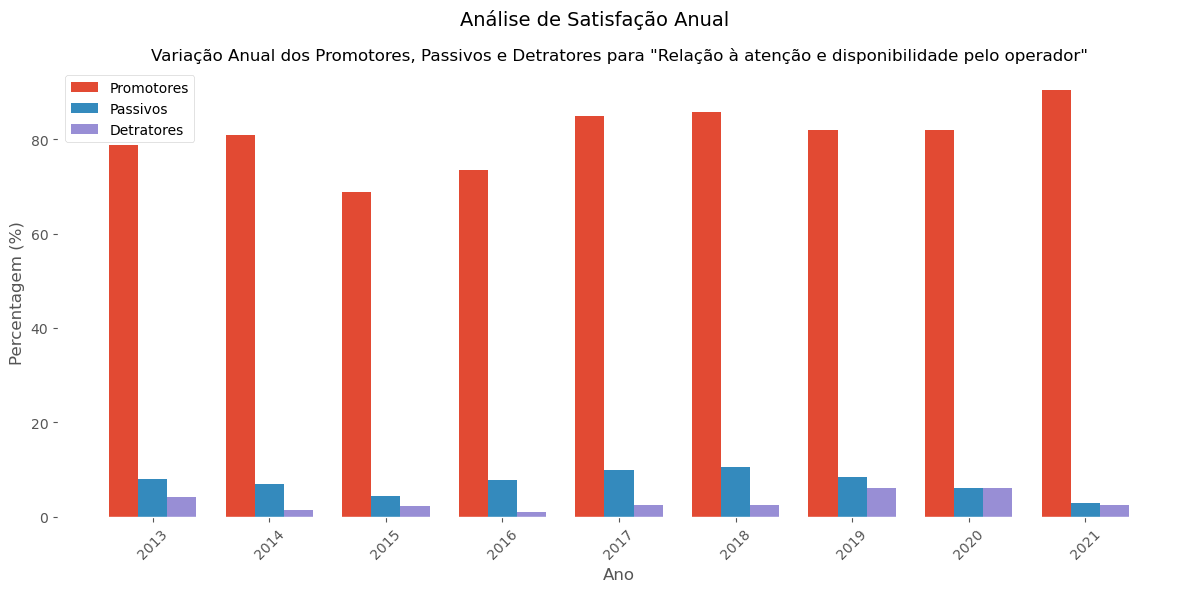

In [115]:
# Assegura que a coluna 'Período' seja tratada como string
satisfacao_codu['Período'] = satisfacao_codu['Período'].astype(str)

# Adiciona a coluna 'Ano' extraída do período
satisfacao_codu['Ano'] = satisfacao_codu['Período'].str[:4]

# Filtrar os dados para a pergunta específica
dados_filtrados = satisfacao_codu[satisfacao_codu['Pergunta'] == 'Relação à atenção e disponibilidade pelo operador']

# Selecionar apenas as colunas numéricas para agrupar
colunas_numericas = ['Promotores', 'Passivos', 'Detratores']

# Agrupar os dados por ano e calcular a média dos percentuais
dados_anuais = dados_filtrados.groupby('Ano')[colunas_numericas].mean().reset_index()

# Configura o estilo do gráfico (opcional)
plt.style.use('ggplot')

# Configura o tamanho da figura
plt.figure(figsize=(12, 6))

# Define a largura das barras e a posição no eixo x
largura_barras = 0.25
anos = np.arange(len(dados_anuais['Ano']))

# Cria as barras para cada grupo
plt.bar(anos - largura_barras, dados_anuais['Promotores'], width=largura_barras, label='Promotores')
plt.bar(anos, dados_anuais['Passivos'], width=largura_barras, label='Passivos')
plt.bar(anos + largura_barras, dados_anuais['Detratores'], width=largura_barras, label='Detratores')

# Adiciona título, subtítulo e rótulos aos eixos
plt.suptitle('Análise de Satisfação Anual', fontsize=14)
plt.title('Variação Anual dos Promotores, Passivos e Detratores para "Relação à atenção e disponibilidade pelo operador"', fontsize=12)
plt.xlabel('Ano')
plt.ylabel('Percentagem (%)')

# Define os ticks do eixo x para exibir todos os anos
plt.xticks(anos, dados_anuais['Ano'], rotation=45)

# Adiciona uma legenda
plt.legend(facecolor='white')

# Define o fundo branco
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Exibe o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()


A análise anual do gráfico permite constatar:
- Os promotores (barra vermelha) mantêm uma percentagem elevada entre 70% e 80% durante todos os anos.
- Em 2014, 2017 observa-se um ligeiro aumento, alcançando quase 90% em 2021.
- Os passivos (barra azul) têm uma presença maior em 2013 e 2014, mas diminuem ligeiramente nos anos subsequentes, permanecendo entre 10% e 20%.
- Os detratores (barra roxa) têm percentagens muito baixas, geralmente abaixo de 10% ao longo de todo o período analisado.
- A presença de detratores é mais perceptível em 2013 e 2014, mas diminui drasticamente nos anos seguintes.

##### Competência e profissionalismo do operador

###### Variação Mensal

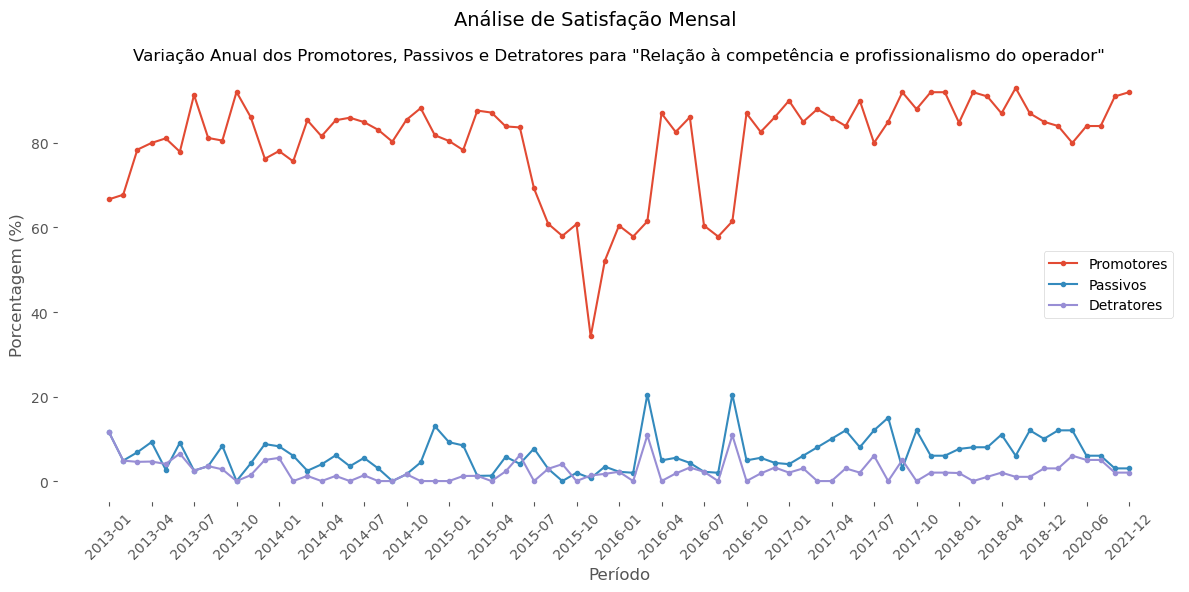

In [120]:
# Assegura que a coluna 'Período' seja tratada como string
satisfacao_codu['Período'] = satisfacao_codu['Período'].astype(str)

# Filtrar os dados para a pergunta específica
dados_filtrados = satisfacao_codu[satisfacao_codu['Pergunta'] == 'Relação à competência e profissionalismo do operador']

# Ordenar os dados pelo período para garantir a correta visualização temporal
dados_filtrados = dados_filtrados.sort_values(by='Período')

# Define a coluna de período como o índice do DataFrame
dados_filtrados.set_index('Período', inplace=True)

# Converte o índice Period para strings para compatibilidade com Matplotlib
dados_filtrados.index = dados_filtrados.index.astype(str)

# Configura o estilo do gráfico (opcional)
plt.style.use('ggplot')  # Usando um estilo válido como exemplo

# Cria o gráfico
plt.figure(figsize=(12, 6))

# Plota cada linha
plt.plot(dados_filtrados.index, dados_filtrados['Promotores'], label='Promotores', marker='.')
plt.plot(dados_filtrados.index, dados_filtrados['Passivos'], label='Passivos', marker='.')
plt.plot(dados_filtrados.index, dados_filtrados['Detratores'], label='Detratores', marker='.')

# Adiciona título e rótulos aos eixos
plt.suptitle('Análise de Satisfação Mensal', fontsize=14)
plt.title('Variação Anual dos Promotores, Passivos e Detratores para "Relação à competência e profissionalismo do operador"', fontsize=12)
plt.xlabel('Período')
plt.ylabel('Porcentagem (%)')

# Adiciona uma legenda
plt.legend(facecolor='white')

# Define o fundo branco
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Configura os ticks do eixo x para exibir de 3 em 3 períodos
plt.xticks(ticks=dados_filtrados.index[::3], labels=dados_filtrados.index[::3], rotation=45)

# Exibe o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()


O gráfico acima permite-nos contatar:
- A linha dos promotores (vermelha) mostra uma tendência geral de aumento entre 2013 e 2021, com percentagens consistentemente acima de 70%.
- Há uma queda significativa com início em meados de 2015, onde a percentagem de promotores cai abaixo de 40%, mas  recupera rapidamente para níveis anteriores. Existe uma segunda queda significativa com início em Julho de 2016 com valores abaixo de 60%.
- A linha dos passivos (azul) apresenta variações menores ao longo do tempo, mantendo-se geralmente entre 10% e 20%. Ocorrem pequenos picos esporadicamente, mas não há grandes variações no comportamento geral.
- A linha dos detratores (roxa) mantém-se abaixo de 10% durante quase todo o período analisado, com picos ocasionais, mas sem grande impacto.

###### Variação Anual

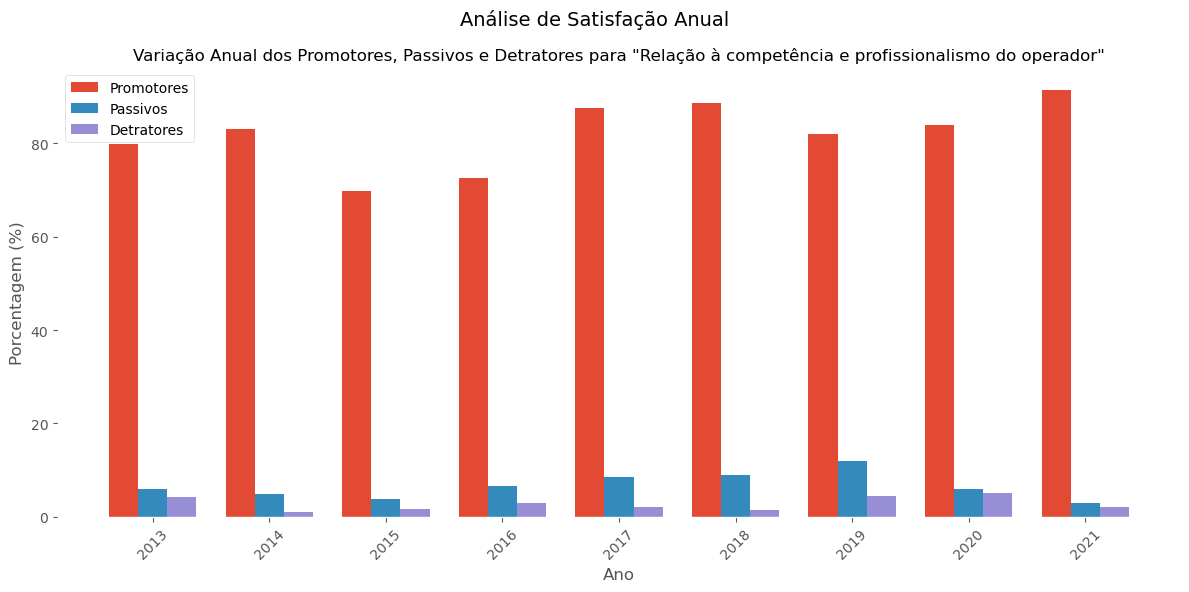

In [124]:
# Assegura que a coluna 'Período' seja tratada como string
satisfacao_codu['Período'] = satisfacao_codu['Período'].astype(str)

# Adiciona a coluna 'Ano' extraída do período
satisfacao_codu['Ano'] = satisfacao_codu['Período'].str[:4]

# Filtrar os dados para a pergunta específica
dados_filtrados = satisfacao_codu[satisfacao_codu['Pergunta'] == 'Relação à competência e profissionalismo do operador']

# Selecionar apenas as colunas numéricas para agrupar
colunas_numericas = ['Promotores', 'Passivos', 'Detratores']

# Agrupar os dados por ano e calcular a média dos percentuais
dados_anuais = dados_filtrados.groupby('Ano')[colunas_numericas].mean().reset_index()

# Configura o estilo do gráfico (opcional)
plt.style.use('ggplot')

# Configura o tamanho da figura
plt.figure(figsize=(12, 6))

# Define a largura das barras e a posição no eixo x
largura_barras = 0.25
anos = np.arange(len(dados_anuais['Ano']))

# Cria as barras para cada grupo
plt.bar(anos - largura_barras, dados_anuais['Promotores'], width=largura_barras, label='Promotores')
plt.bar(anos, dados_anuais['Passivos'], width=largura_barras, label='Passivos')
plt.bar(anos + largura_barras, dados_anuais['Detratores'], width=largura_barras, label='Detratores')

# Adiciona título, subtítulo e rótulos aos eixos
plt.suptitle('Análise de Satisfação Anual', fontsize=14)
plt.title('Variação Anual dos Promotores, Passivos e Detratores para "Relação à competência e profissionalismo do operador"', fontsize=12)
plt.xlabel('Ano')
plt.ylabel('Porcentagem (%)')

# Define os ticks do eixo x para exibir todos os anos
plt.xticks(anos, dados_anuais['Ano'], rotation=45)

# Adiciona uma legenda
plt.legend(facecolor='white')

# Define o fundo branco
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Exibe o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()

A análise anual do gráfico permite constatar:
- Os promotores (barra vermelha) mantêm uma percentagem elevada entre 70% e 80% durante todos os anos.
- Em 2014 e 2017 observa-se um ligeiro aumento, alcançando quase 90% em 2021.
- Os passivos (barra azul) têm uma presença maior em 2019, mas mantêm-se entre 10% e 15% nos restantes anos.
- Os detratores (barra roxa) têm percentagens muito baixas, geralmente abaixo de 10% ao longo de todo o período analisado.
- A presença de detratores é mais perceptível em 2020.

##### Relação à atenção e disponibilidade pelo operador

###### Variação mensal

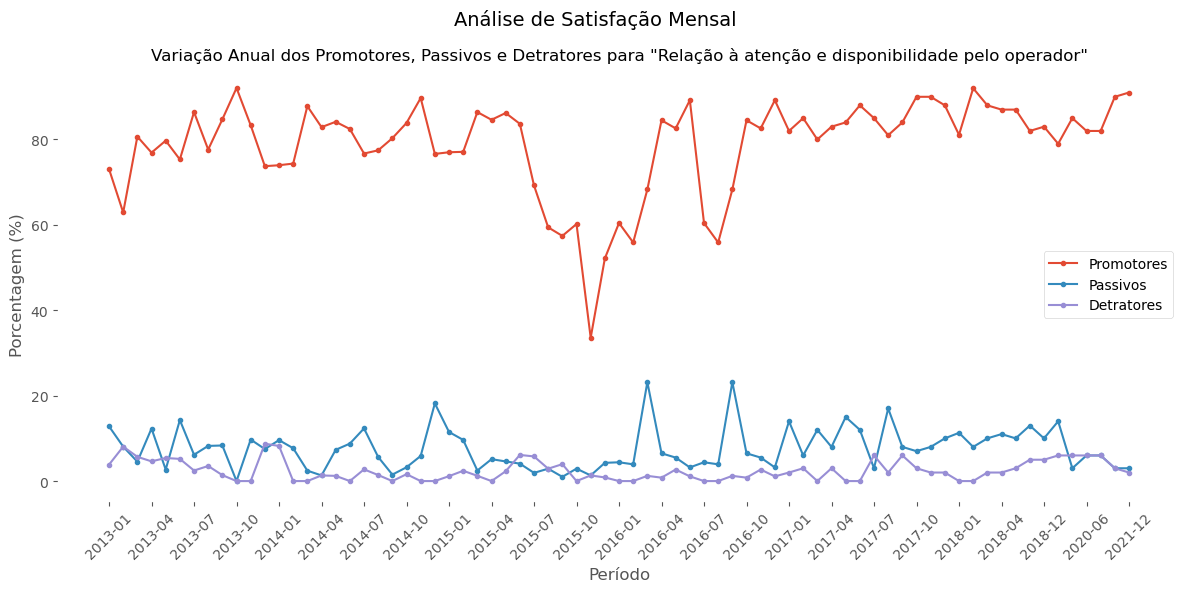

In [129]:
# Assegura que a coluna 'Período' seja tratada como string
satisfacao_codu['Período'] = satisfacao_codu['Período'].astype(str)

# Filtrar os dados para a pergunta específica
dados_filtrados = satisfacao_codu[satisfacao_codu['Pergunta'] == 'Relação à atenção e disponibilidade pelo operador']

# Ordenar os dados pelo período para garantir a correta visualização temporal
dados_filtrados = dados_filtrados.sort_values(by='Período')

# Define a coluna de período como o índice do DataFrame
dados_filtrados.set_index('Período', inplace=True)

# Converte o índice Period para strings para compatibilidade com Matplotlib
dados_filtrados.index = dados_filtrados.index.astype(str)

# Configura o estilo do gráfico (opcional)
plt.style.use('ggplot')  # Usando um estilo válido como exemplo

# Cria o gráfico
plt.figure(figsize=(12, 6))

# Plota cada linha
plt.plot(dados_filtrados.index, dados_filtrados['Promotores'], label='Promotores', marker='.')
plt.plot(dados_filtrados.index, dados_filtrados['Passivos'], label='Passivos', marker='.')
plt.plot(dados_filtrados.index, dados_filtrados['Detratores'], label='Detratores', marker='.')

# Adiciona título e rótulos aos eixos
plt.suptitle('Análise de Satisfação Mensal', fontsize=14)
plt.title('Variação Anual dos Promotores, Passivos e Detratores para "Relação à atenção e disponibilidade pelo operador"', fontsize=12)
plt.xlabel('Período')
plt.ylabel('Porcentagem (%)')

# Adiciona uma legenda
plt.legend(facecolor='white')

# Define o fundo branco
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Configura os ticks do eixo x para exibir de 3 em 3 períodos
plt.xticks(ticks=dados_filtrados.index[::3], labels=dados_filtrados.index[::3], rotation=45)

# Exibe o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()


O gráfico acima permite-nos concluir:
- A linha dos promotores (vermelha) mostra uma tendência geral de aumento entre 2013 e 2021, com percentagens consistentemente acima de 70%.
- Há uma queda significativa com início em meados de 2015, onde a percentagem de promotores cai abaixo de 40%, mas  recupera rapidamente para níveis anteriores. Existe uma segunda queda significativa com início em Julho de 2016 com valores abaixo de 60%.
- A linha dos passivos (azul) apresenta variações menores ao longo do tempo, mantendo-se geralmente entre 10% e, por vezes, acima de 20%. Ocorrem pequenos picos esporadicamente, mas não há grandes variações no comportamento geral.
- A linha dos detratores (roxa) mantém-se abaixo de 10% durante quase todo o período analisado, com picos ocasionais, mas sem grande impacto.

###### Variação Anual

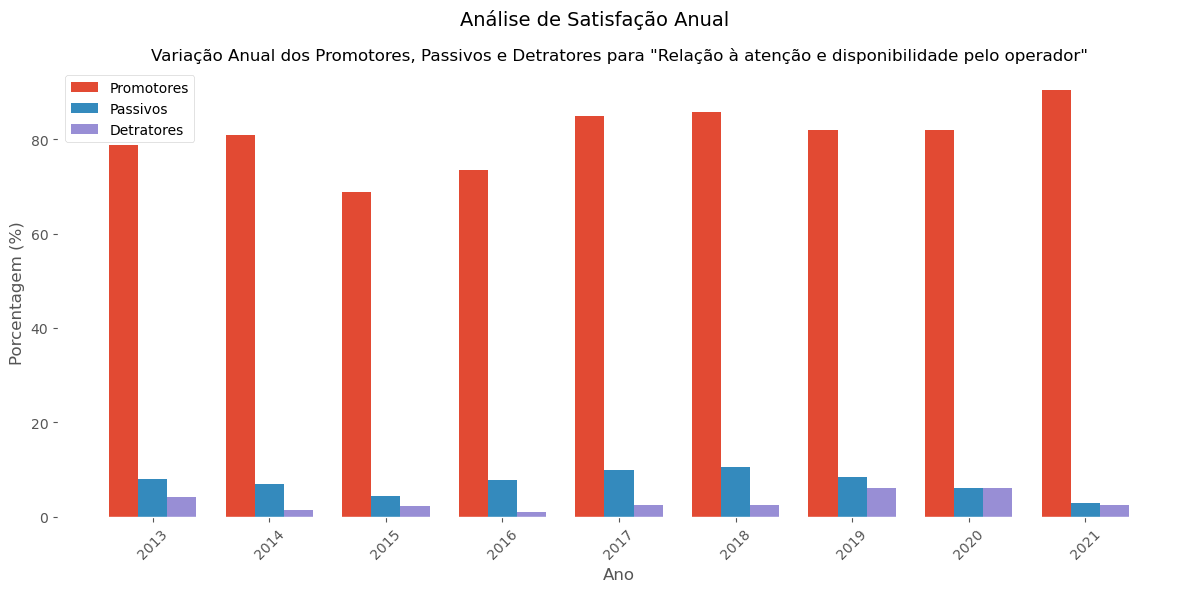

In [133]:
# Assegura que a coluna 'Período' seja tratada como string
satisfacao_codu['Período'] = satisfacao_codu['Período'].astype(str)

# Adiciona a coluna 'Ano' extraída do período
satisfacao_codu['Ano'] = satisfacao_codu['Período'].str[:4]

# Filtrar os dados para a pergunta específica
dados_filtrados = satisfacao_codu[satisfacao_codu['Pergunta'] == 'Relação à atenção e disponibilidade pelo operador']

# Selecionar apenas as colunas numéricas para agrupar
colunas_numericas = ['Promotores', 'Passivos', 'Detratores']

# Agrupar os dados por ano e calcular a média dos percentuais
dados_anuais = dados_filtrados.groupby('Ano')[colunas_numericas].mean().reset_index()

# Configura o estilo do gráfico (opcional)
plt.style.use('ggplot')

# Configura o tamanho da figura
plt.figure(figsize=(12, 6))

# Define a largura das barras e a posição no eixo x
largura_barras = 0.25
anos = np.arange(len(dados_anuais['Ano']))

# Cria as barras para cada grupo
plt.bar(anos - largura_barras, dados_anuais['Promotores'], width=largura_barras, label='Promotores')
plt.bar(anos, dados_anuais['Passivos'], width=largura_barras, label='Passivos')
plt.bar(anos + largura_barras, dados_anuais['Detratores'], width=largura_barras, label='Detratores')

# Adiciona título, subtítulo e rótulos aos eixos
plt.suptitle('Análise de Satisfação Anual', fontsize=14)
plt.title('Variação Anual dos Promotores, Passivos e Detratores para "Relação à atenção e disponibilidade pelo operador"', fontsize=12)
plt.xlabel('Ano')
plt.ylabel('Porcentagem (%)')

# Define os ticks do eixo x para exibir todos os anos
plt.xticks(anos, dados_anuais['Ano'], rotation=45)

# Adiciona uma legenda
plt.legend(facecolor='white')

# Define o fundo branco
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Exibe o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()


A análise anual do gráfico permite constatar:
- Os promotores (barra vermelha) mantêm uma percentagem elevada entre 70% e 80% durante todos os anos.
- Em 2014 e 2017 observa-se um ligeiro aumento, alcançando quase 90% em 2021.
- Os passivos (barra azul) têm uma presença maior em 2021, mas mantêm-se entre 5% e 15% nos restantes anos.
- Os detratores (barra roxa) têm percentagens muito baixas, geralmente abaixo de 10% ao longo de todo o período analisado.
- A presença de detratores é mais perceptível entre 2019 e 2020.

### transferencias_sns24

#### Variação das Chamadas de Emergência Transferidas para a Saúde 24 por Período

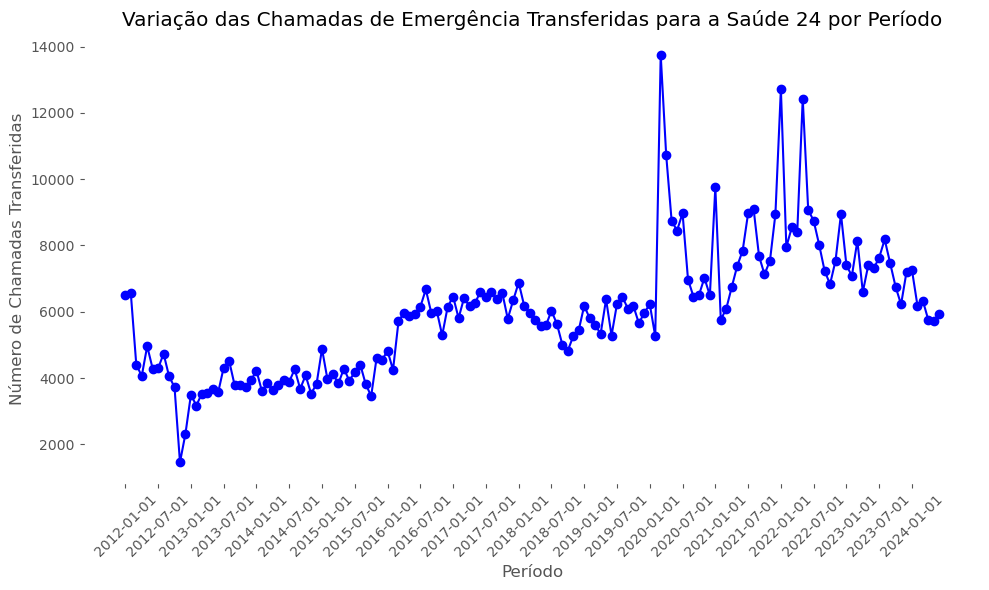

In [138]:
if transferencias_sns24['Período'].dtype == 'period[M]':
    transferencias_sns24['Período'] = transferencias_sns24['Período'].dt.to_timestamp()

# Ordenar o DataFrame pelo período
transferencias_sns24 = transferencias_sns24.sort_values(by='Período')

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(transferencias_sns24['Período'].astype(str), transferencias_sns24['Nº Chamadas de Emergência Transferidas para a Saúde 24'], marker='o', color='blue')

# Adicionar título e rótulos
plt.title('Variação das Chamadas de Emergência Transferidas para a Saúde 24 por Período')
plt.xlabel('Período')
plt.ylabel('Número de Chamadas Transferidas')

# Configurar os ticks do eixo x para aparecerem de 6 em 6 meses
periods = transferencias_sns24['Período'].astype(str)
num_periods = len(periods)
ticks = periods[::6]  # Seleciona de 3 em 3 períodos
tick_positions = range(0, num_periods, 6)  # Posições correspondentes

plt.xticks(tick_positions, ticks, rotation=45)

# Define o fundo branco
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Exibir o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()

Tendo em conta o gráfico acima podemos extrair as seguintes conclusões:
- O número de chamadas transferidas para o SNS24 tem variações significativas ao longo do tempo em análise.
- No início do período (2012), há flutuações entre 2000 e 6000 chamadas.
- A partir de 2016, o número de chamadas começa a aumentar, com picos mais frequentes.
Picos Significativos:

Em 2012-10, há um pico em torno de 12.000 chamadas.
Outro pico significativo ocorre em 2020-03, também alcançando cerca de 12.000 chamadas.
Outros picos menores, mas ainda significativos, são observados em meados de 2013, início de 2015, meados de 2016 e início de 2018.
Variações e Padrões Sazonais:

Há uma variação cíclica no número de chamadas transferidas, com períodos de alta e baixa frequência.
Os períodos de alta frequência parecem ocorrer com intervalos regulares, sugerindo algum padrão sazonal ou cíclico nas transferências.
Impacto de Eventos Específicos:

Aumento dramático em 2020 pode ser associado ao início da pandemia de COVID-19, onde a demanda por serviços de saúde e triagem aumentou significativamente.
Picos em outros anos podem estar associados a surtos de doenças, eventos sazonais como epidemias de gripe, ou outras crises de saúde pública.

### atividade_sns24

#### Correlação entre Chamadas Atendidas e Tempo Médio de Espera

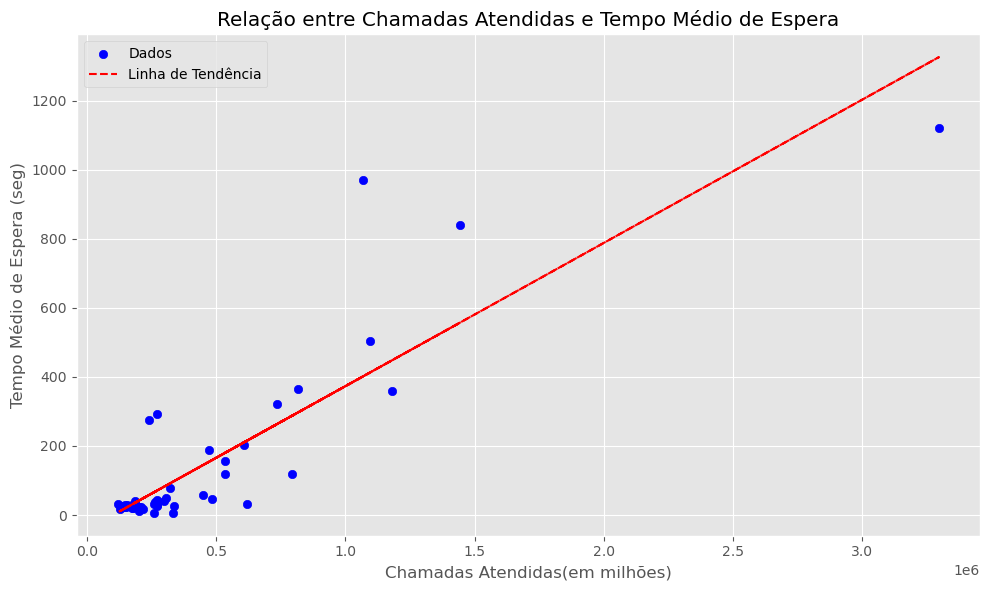

Coeficiente de Correlação de Pearson: 0.87
Equação da Linha de Tendência: y = 0.00x + -41.65


In [143]:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(atividade_sns24_pivot['Chamadas Atendidas'], atividade_sns24_pivot['Tempo Médio de Espera (seg)'], color='blue', label='Dados')

# Adicionar a linha de tendência
z = np.polyfit(atividade_sns24_pivot['Chamadas Atendidas'], atividade_sns24_pivot['Tempo Médio de Espera (seg)'], 1)
p = np.poly1d(z)
plt.plot(atividade_sns24_pivot['Chamadas Atendidas'], p(atividade_sns24_pivot['Chamadas Atendidas']), color='red', linestyle='--', label='Linha de Tendência')

# Adicionar títulos e labels
plt.title('Relação entre Chamadas Atendidas e Tempo Médio de Espera')
plt.xlabel('Chamadas Atendidas(em milhões)')
plt.ylabel('Tempo Médio de Espera (seg)')
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular o coeficiente de correlação de Pearson
correlacao, p_valor = pearsonr(atividade_sns24_pivot['Chamadas Atendidas'], atividade_sns24_pivot['Tempo Médio de Espera (seg)'])
print(f'Coeficiente de Correlação de Pearson: {correlacao:.2f}')

# Exibir a equação da linha de tendência
m, b = z
print(f'Equação da Linha de Tendência: y = {m:.2f}x + {b:.2f}')

Os pontos azuis do gráfico representam a relação entre o número de chamadas atendidas e o tempo médio de espera.

Este gráfico permite inferir algumas conclusões:
- A maioria dos pontos está concentrada na faixa de 0 a 1 milhão de chamadas atendidas, com tempos de espera que variam de 0 a 400 segundos.

- Alguns pontos outliers são visíveis, especialmente um ponto acima de 1000 segundos de espera e outro com mais de 3 milhões de chamadas atendidas.

- A linha de tendência vermelha é uma representação linear que melhor ajusta os dados. 

- O coeficiente de correlação de Pearson é 0.87, o que indica uma correlação positiva forte entre o número de chamadas atendidas e o tempo médio de espera. Isto é esperado, pois um maior volume de chamadas geralmente leva a tempos de espera mais longos devido à capacidade limitada de atendimento.

- Os outliers podem estar podem representar eventos extraordinários onde o sistema foi sobrecarregado (por exemplo, durante a pandemia de COVID-19) ou outros fatores que aumentaram significativamente o tempo de espera.

- A análise sugere que o sistema de atendimento tem uma capacidade limitada e que, além de um certo ponto, aumentos adicionais no volume de chamadas resultam em aumentos significativos no tempo de espera.

#### Variação do Tempo Médio de Espera (seg) por Mês

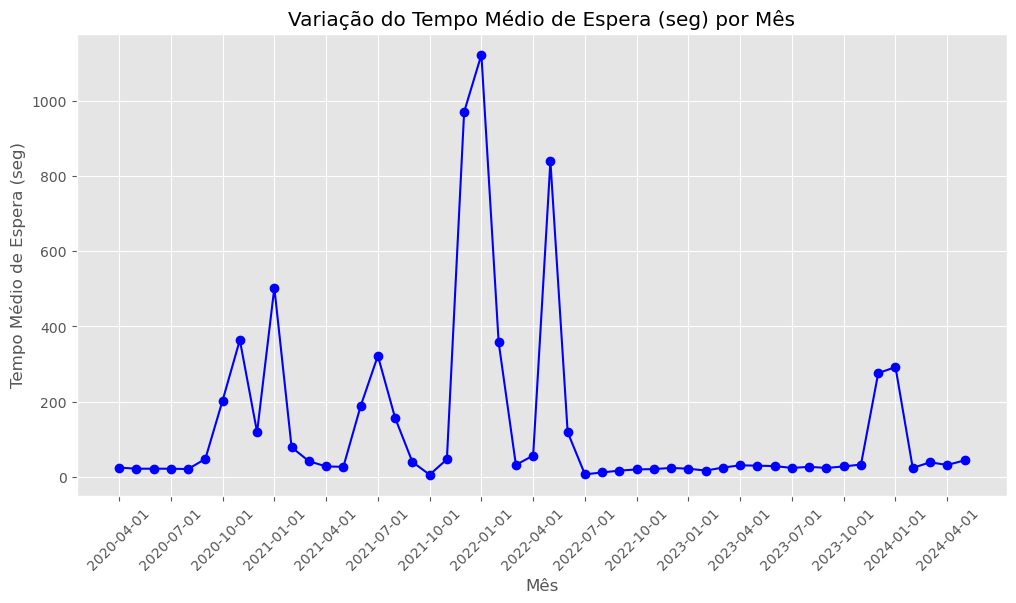

In [110]:
# Convert 'Periodo' to string for plotting if not already done
if 'Periodo_str' not in atividade_sns24_pivot.columns:
    atividade_sns24_pivot['Periodo_str'] = atividade_sns24_pivot['Periodo'].astype(str)

# Gráfico: Tempo Médio de Espera (seg)
plt.figure(figsize=(12, 6))
plt.plot(atividade_sns24_pivot['Periodo_str'], atividade_sns24_pivot['Tempo Médio de Espera (seg)'], marker='o', color='blue')
plt.title('Variação do Tempo Médio de Espera (seg) por Mês')
plt.xlabel('Mês')
plt.ylabel('Tempo Médio de Espera (seg)')
plt.grid(True)

# Adjust x-axis labels to show fewer ticks
plt.xticks(ticks=atividade_sns24_pivot.index[::3], labels=atividade_sns24_pivot['Periodo_str'][::3], rotation=45)

plt.show()


O gráfico mostra a variação do tempo médio de espera (em segundos) por mês, sendo que são de destacar os padrões:

- Picos: Existem alguns picos significativos no tempo médio de espera, nomeadamente em Outubro de 2020 (400 segundos), Janeiro de 2021 (500 segundos), Julho de 2021 (400 segundos), Janeiro de 2022 (1000 segundos) e Maio de 2022 (800 segundos).
- Vales: Existem vários períodos onde o tempo médio de espera é próximo de zero, indicando um tempo de espera muito baixo ou inexistente.
- De abril de 2020 a outubro de 2021, há uma tendência de aumento no tempo médio de espera, com vários picos significativos.
- Após outubro de 2021, o tempo médio de espera cai drasticamente e mantém-se baixo até outubro de 2023, com apenas alguns pequenos aumentos.
- O gráfico mostra períodos de estabilidade, especialmente entre abril de 2022 e outubro de 2023, onde o tempo médio de espera é consistentemente baixo.
- As flutuações nos tempos de espera parecem estar associadas a eventos específicos ou mudanças sazonais, o que sugere que fatores externos ou operacionais podem ter influência nestes tempos.

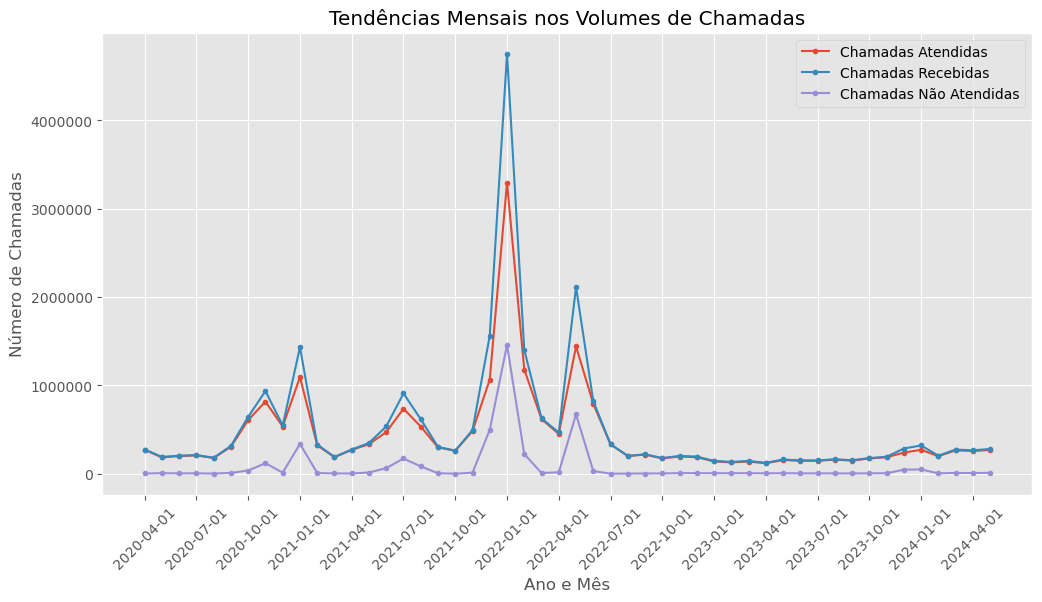

In [112]:
plt.figure(figsize=(12, 6))
plt.plot(atividade_sns24_pivot['Periodo_str'], atividade_sns24_pivot['Chamadas Atendidas'], marker='.', label='Chamadas Atendidas')
plt.plot(atividade_sns24_pivot['Periodo_str'], atividade_sns24_pivot['Chamadas Recebidas'], marker='.', label='Chamadas Recebidas')
plt.plot(atividade_sns24_pivot['Periodo_str'], atividade_sns24_pivot['Chamadas Não Atendidas'], marker='.', label='Chamadas Não Atendidas')

# Configurar o eixo y para usar o formato inteiro em vez de notação científica
formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Tendências Mensais nos Volumes de Chamadas')
plt.xlabel('Ano e Mês')
plt.ylabel('Número de Chamadas')
plt.legend()
plt.grid(True)
plt.xticks(ticks=atividade_sns24_pivot.index[::3], labels=atividade_sns24_pivot['Periodo_str'][::3], rotation=45)
plt.show()


#### Tendências Mensais nos Volumes de Chamadas

O gráfico acima permite tirar as seguintes conclusões:
- As alterações significativas na chamadas do SNS24 ocorrem entre 2020 e 2022, os anos que correpondem à pandemia de COVID-19
- Existem vários picos sendo o mais significativo de Janeiro de 2022 que coincide com o pico de casos de COVID-19. É neste mês que se registam mais chamadas atendidas e mais chamadas não atendidas.
- Após Julho de 2022 as chamadas não atendidas são tangencialmente próximas de 0.

#### Análise à Taxa de Atendimento

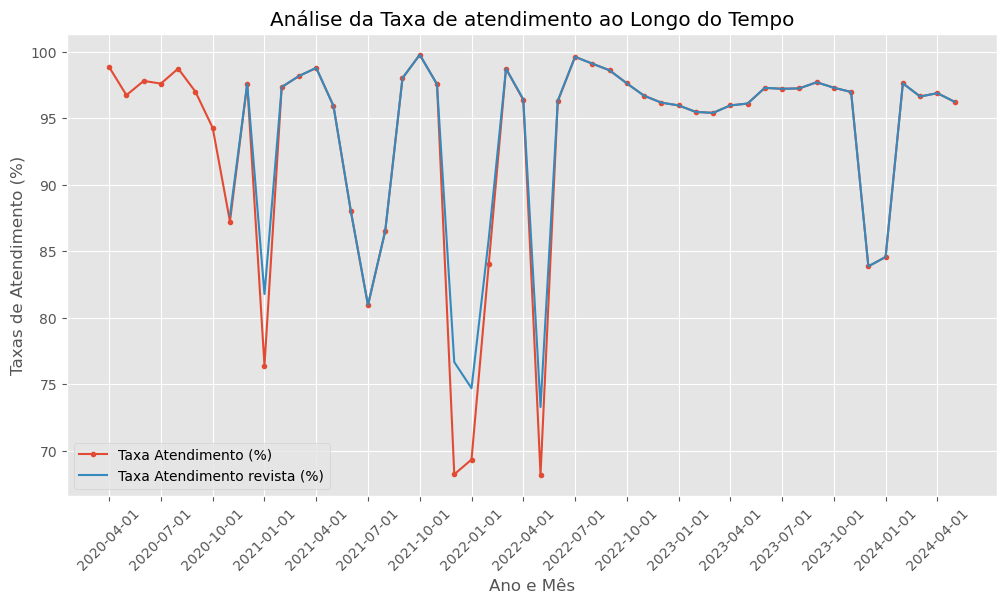

In [116]:
plt.figure(figsize=(12, 6))
plt.plot(atividade_sns24_pivot['Periodo_str'], atividade_sns24_pivot['Taxa Atendimento (%)'], marker='.', label='Taxa Atendimento (%)')
plt.plot(atividade_sns24_pivot['Periodo_str'], atividade_sns24_pivot['Taxa Atendimento revista (%)'], marker='', label='Taxa Atendimento revista (%)')
plt.title('Análise da Taxa de atendimento ao Longo do Tempo')
plt.xlabel('Ano e Mês')
plt.ylabel('Taxas de Atendimento (%)')
plt.legend()
plt.grid(True)
plt.xticks(ticks=atividade_sns24_pivot.index[::3], labels=atividade_sns24_pivot['Periodo_str'][::3], rotation=45)
plt.show()


 - As quedas acentuadas nas taxas de atendimento coincidem com os picos de casos de COVID-19 em Portugal. Durante esses períodos, o aumento abrupto no volume de chamadas provavelmente sobrecarregou os sistemas de atendimento, resultando numa diminuição na eficiência e na satisfação dos utentes.
 - Períodos com taxas de atendimento próximas de 100% indicam uma eficiência operacional elevada, onde o serviço conseguiu atender as necessidades dos utentes de forma satisfatória.
 - A tendência da taxa de atendimento varia significativamente ao longo do período em análise, sendo observados picos e vales acentuados, o que representa variações mensais na taxa de atendimento. - 
O pico mais elevado ocorre em torno de outubro de 2020, com uma taxa de atendimento próxima a 100%. - 
Os vales mais pronunciados encontram-se em dezembro de 2021 e maio de 2022, com taxas de atendimento abaixo de 70%.


#### Somatório Anual das Chamadas Atendidas, Recebidas e Não Atendidas

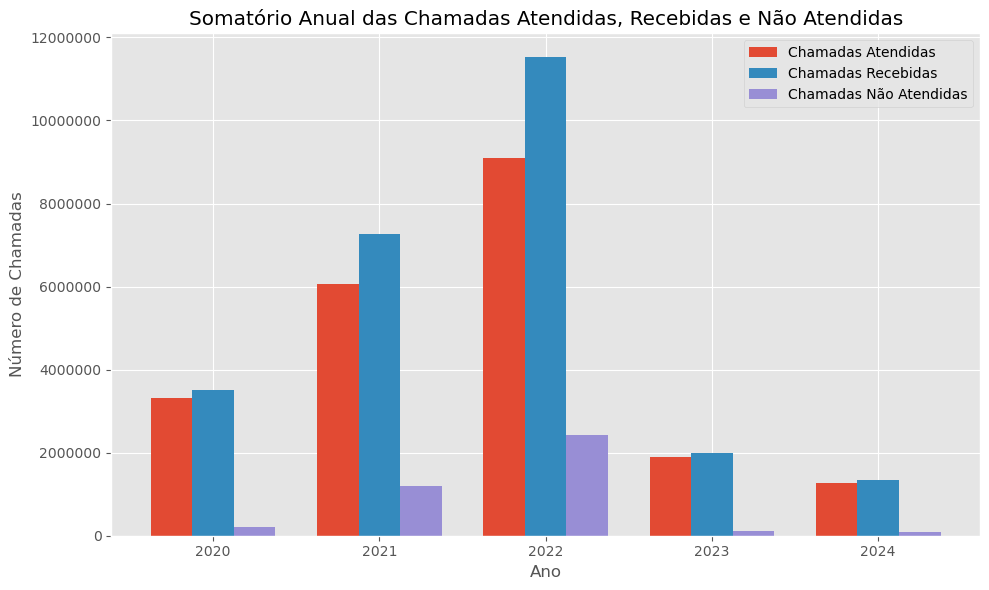

In [119]:
# Converter 'Periodo' para ano
atividade_sns24_pivot['Ano'] = atividade_sns24_pivot['Periodo'].dt.year

# Agrupar por ano e calcular os somatórios anuais
somatorios_anuais = atividade_sns24_pivot.groupby('Ano')[['Chamadas Atendidas', 'Chamadas Recebidas', 'Chamadas Não Atendidas']].sum().reset_index()

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.25  # Largura das barras
index = np.arange(len(somatorios_anuais['Ano']))  # Índices das barras

# Cria as barras para Chamadas Atendidas, Chamadas Recebidas e Chamadas Não Atendidas
plt.bar(index - bar_width, somatorios_anuais['Chamadas Atendidas'], bar_width, label='Chamadas Atendidas')
plt.bar(index, somatorios_anuais['Chamadas Recebidas'], bar_width, label='Chamadas Recebidas')
plt.bar(index + bar_width, somatorios_anuais['Chamadas Não Atendidas'], bar_width, label='Chamadas Não Atendidas')

# Adiciona títulos e labels
plt.title('Somatório Anual das Chamadas Atendidas, Recebidas e Não Atendidas')
plt.xlabel('Ano')
plt.ylabel('Número de Chamadas')
plt.xticks(index, somatorios_anuais['Ano'])  # Define os rótulos do eixo x como os anos
plt.legend()

# Configurar o eixo y para usar o formato inteiro em vez de notação científica
formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

# Exibe o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

Os somatórios anuais das chamadas permitem-nos chegar às seguintes conclusões:
- Os anos de 2020 a 2022 apresentam uma tendência crescente de chamadas das três tipologias analisadas.
- O ano 2023 corresponde a uma alteração da tendeência de crescimentos, registando-se um descréscimo de chamadas nas três categorias em análise.
- O ano de 2024 não permite ainda tirar conclusões, no entanto, parece antever uma estabilização dos dados face a 2023.

### chamadas_codu vs atividade_sns24

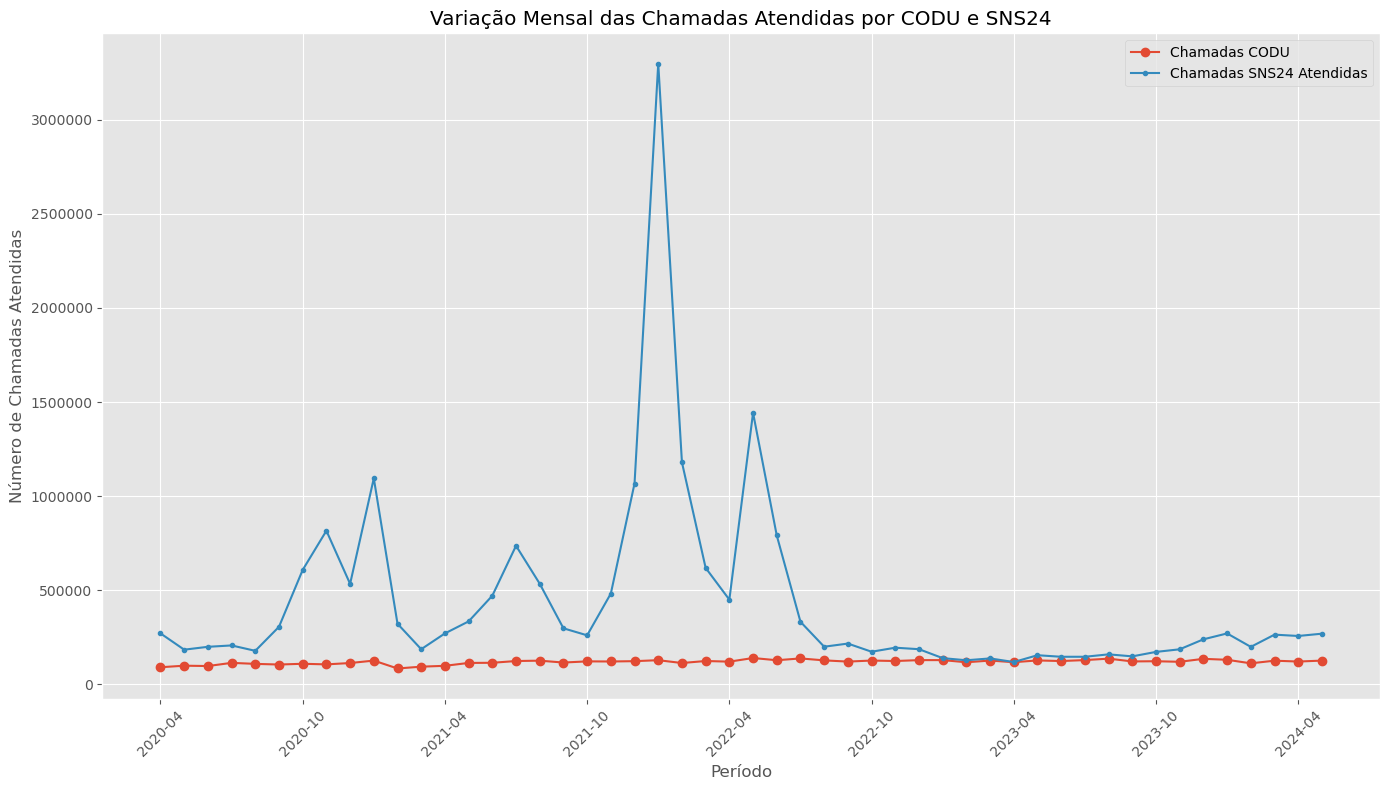

In [122]:
atividade_sns24 = pd.read_csv('atividade-operacional-do-sns-24.csv', delimiter=';')
# Rename the column to remove any hidden characters and facilitate access
atividade_sns24.rename(columns=lambda x: x.strip(), inplace=True)
atividade_sns24.rename(columns={'﻿Período': 'Periodo'}, inplace=True)

# Pivot the table to get indicators in columns and periods in rows
atividade_sns24_pivot = atividade_sns24.pivot(index='Periodo', columns='Indicador', values='Valor')
atividade_sns24_pivot.reset_index(inplace=True)

# Convert the 'Periodo' column to Period type (year and month)
atividade_sns24_pivot['Periodo'] = pd.to_datetime(atividade_sns24_pivot['Periodo'], format='%Y-%m').dt.to_period('M')

# Convert percentage columns to float64
atividade_sns24_pivot['Taxa Atendimento (%)'] = atividade_sns24_pivot['Taxa Atendimento (%)'].astype('float64')
atividade_sns24_pivot['Taxa Atendimento revista (%)'] = atividade_sns24_pivot['Taxa Atendimento revista (%)'].astype('float64')

# Convert other columns to int64
cols_to_int64 = [
    'Chamadas Atendidas',
    'Chamadas Recebidas',
    'Chamadas aconselhamento: Profissionais de saúde',
    'Chamadas aconselhamento: Utentes',
    'Chamadas atendidas no SNS 24 via iLGP',
    'Tempo Médio de Espera (seg)'
]

atividade_sns24_pivot[cols_to_int64] = atividade_sns24_pivot[cols_to_int64].astype('int64')

# Converter as colunas de período para string para garantir que estão no mesmo formato
chamadas_codu['Período'] = chamadas_codu['Período'].astype(str)
atividade_sns24_pivot['Periodo'] = atividade_sns24_pivot['Periodo'].astype(str)

# Certificar que os períodos são compatíveis
common_periods = set(chamadas_codu['Período']).intersection(set(atividade_sns24_pivot['Periodo']))

# Filtrar os dados para os períodos comuns
chamadas_codu_filtered = chamadas_codu[chamadas_codu['Período'].isin(common_periods)]
atividade_sns24_filtered = atividade_sns24_pivot[atividade_sns24_pivot['Periodo'].isin(common_periods)]

# Ordenar os dados para garantir que os períodos estejam alinhados
chamadas_codu_filtered = chamadas_codu_filtered.sort_values('Período')
atividade_sns24_filtered = atividade_sns24_filtered.sort_values('Periodo')

# Plotar os dados
plt.figure(figsize=(14, 8))
# Chamadas CODU
plt.plot(chamadas_codu_filtered['Período'], 
         chamadas_codu_filtered['N º de chamadas de emergência atendidas'], 
         marker='o', label='Chamadas CODU')

# Chamadas SNS24 Atendidas
plt.plot(atividade_sns24_filtered['Periodo'], 
         atividade_sns24_filtered['Chamadas Atendidas'], 
         marker='.', label='Chamadas SNS24 Atendidas')

# Adicionar títulos e rótulos
plt.title('Variação Mensal das Chamadas Atendidas por CODU e SNS24')
plt.xlabel('Período')
plt.ylabel('Número de Chamadas Atendidas')
plt.legend()

# Configurar os ticks do eixo x para aparecerem de 3 em 3 meses
ticks = chamadas_codu_filtered['Período'][::6]
tick_positions = range(0, len(chamadas_codu_filtered), 6)
plt.xticks(tick_positions, ticks, rotation=45)

# Configurar o eixo y para usar o formato inteiro em vez de notação científica
formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


Este gráfico permite-nos chegar às seguintes conclusões:
- As chamadas atendidas pelo CODU (linha vermelha) apresentam uma variação muito menor em comparação com as chamadas atendidas pelo SNS24 (linha azul).
- O número de chamadas atendidas pelo CODU permanece relativamente constante ao longo do período, enquanto o SNS24 mostra variações significativas.
- O SNS24 apresenta picos muito pronunciados, especialmente entre meados de 2020 e início de 2022.
- O maior pico ocorre em Janeiro de 2022, onde o número de chamadas atendidas ultrapassa 3.000.000, um valor significativamente mais alto que qualquer outro período e que corresponde ao pico de casos de covid19 como já verificado anteriormente.
- Após o grande pico de 2022- , há uma tendência de declínio no número de chamadas atendidas pelo SNS24, embora ainda sejam superiores às chamadas atendidas pelo CODU.
Nos anos de 2023 e 2024, o número de chamadas atendidas pelo SNS24 parece estabilizar-se em um nível mais baixo comparado aos picos anteriores, mas ainda acima do CODU.

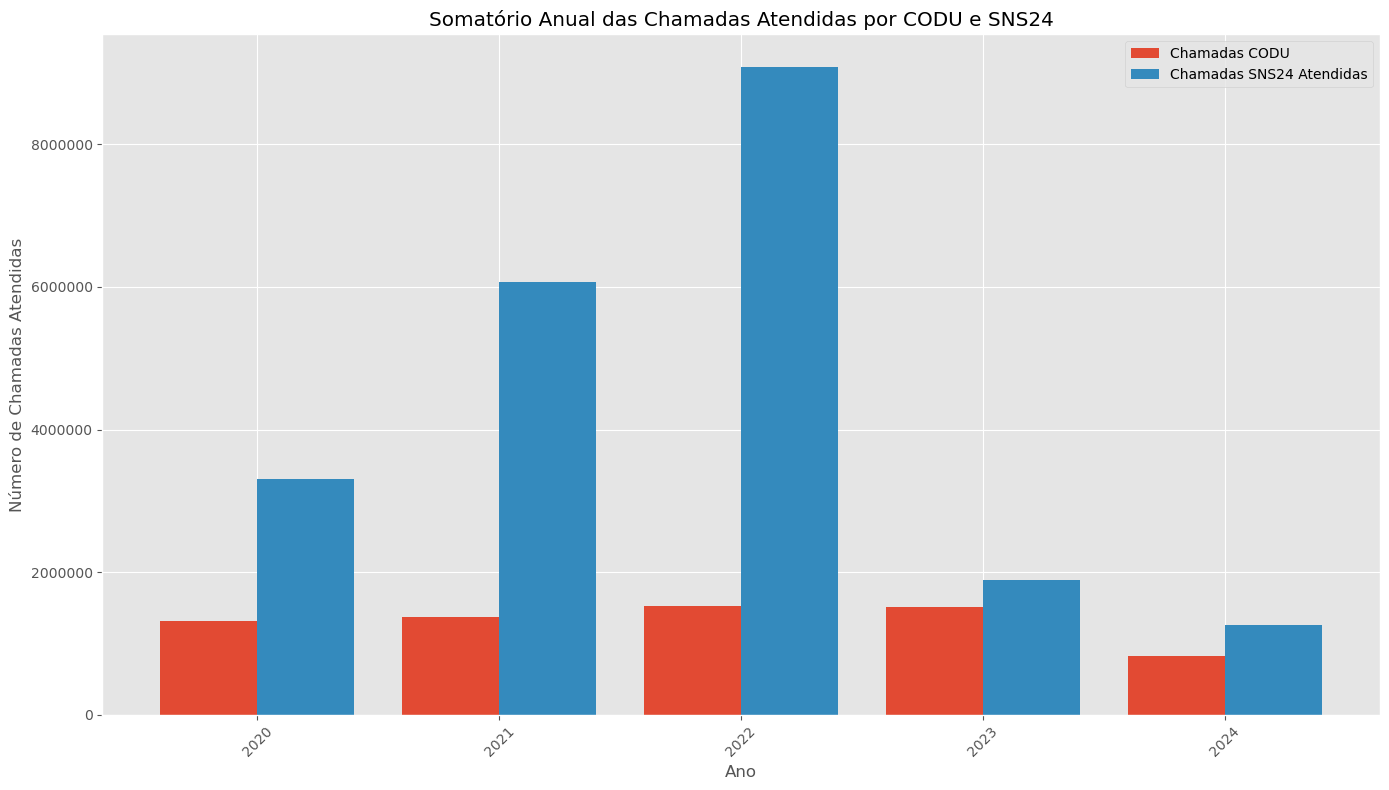

In [124]:
# Extrair o ano das colunas de período
chamadas_codu['Ano'] = chamadas_codu['Período'].str[:4]
atividade_sns24_pivot['Ano'] = atividade_sns24_pivot['Periodo'].str[:4]

# Somatório anual das chamadas atendidas
chamadas_codu_annual = chamadas_codu.groupby('Ano')['N º de chamadas de emergência atendidas'].sum().reset_index()
atividade_sns24_annual = atividade_sns24_pivot.groupby('Ano')['Chamadas Atendidas'].sum().reset_index()

# Combinar os DataFrames para garantir que os anos são compatíveis
annual_data = pd.merge(chamadas_codu_annual, atividade_sns24_annual, on='Ano', how='inner')

# Renomear colunas para facilitar a plotagem
annual_data.columns = ['Ano', 'Chamadas CODU', 'Chamadas SNS24']

# Definir o tamanho da figura
plt.figure(figsize=(14, 8))

# Definir a largura das barras
bar_width = 0.4

# Definir as posições das barras no eixo x
index = np.arange(len(annual_data))

# Criar as barras para chamadas CODU
plt.bar(index, annual_data['Chamadas CODU'], 
        bar_width, label='Chamadas CODU')

# Criar as barras para chamadas SNS24 Atendidas
plt.bar(index + bar_width, annual_data['Chamadas SNS24'], 
        bar_width, label='Chamadas SNS24 Atendidas')

# Adicionar títulos e rótulos
plt.title('Somatório Anual das Chamadas Atendidas por CODU e SNS24')
plt.xlabel('Ano')
plt.ylabel('Número de Chamadas Atendidas')
plt.legend()

# Configurar os ticks do eixo x
plt.xticks(index + bar_width / 2, annual_data['Ano'], rotation=45)

# Configurar o eixo y para usar o formato inteiro em vez de notação científica
formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

# Adicionar grade
plt.grid(True)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


A análise dos somatórios anuais permite-nos concluir:
- O ano de 2022 foi o ano com maior pressão nos callcenters em análise do SNS.
- Os impactos da pandemia de COVID-19 parecem fazer-se notar essencialmente no período temporal de 2020 a 2022 e mais especificamente na linha de SNS24.
Os anos de 2023 e 2024 parecem indiciar uma estabilização no número de chamadas atendidas pelo SNS24.

## Conclusões

* Aumento na Capacidade: O aumento geral nas chamadas pode indicar uma maior necessidade de serviços de emergência ou uma melhoria na capacidade de atendimento ao longo do tempo.

* Análise Detalhada Necessária: Para entender as razões específicas por trás dos picos e vales detetados na atividade do CODU e SNS24, seria importante analisar fatores externos que possam ter influenciado os dados, como políticas de saúde pública, eventos extraordinários, ou mudanças na população e infraestrutura. A análise efetuada com a COVID-19 é apenas um exemplo do impacto que estes eventos possam ter nos serviços de saúde.

* Impacto da Pandemia: O início do surto pandémico de COVID-19 trouxe uma pressão significativa nas chamadas atendidas pelo SNS24, com um aumento dramático em 2020 e 2021. Após o pico, há uma queda e subsequente estabilização, sugerindo que o sistema de saúde se ajustou à nova realidade ou que a necessidade de chamadas relacionadas com a pandemia diminuiu. A análise efetuada sugere que o SNS24 foi mais sensível a eventos extraordinários como a pandemia, enquanto o CODU manteve uma demanda mais constante e previsível.

* Previsões e Planeamento: Com base na tendência de aumento, as autoridades podem usar estes dados no sentido de melhor planear e alocar recursos de maneira mais eficaz no futuro.

* Análise de Outliers: Investigar os outliers pode fornecer dados valiosos sobre eventos específicos que causaram picos,o que permite a implementação de medidas preventivas para futuras ocorrências.

*  A satisfação geral dos utentes do SNS24 em relação ao desempenho global do operador é alta, com a maioria dos usuários sendo promotores. Existiram alguns períodos de declínio (nomeadamente em 2016), mas a tendência de satisfação mantém-se positiva ao longo dos anos. Os passivos e detratores constituem uma pequena parte da base de utentes, indicando um alto nível de satisfação e fidelidade ao serviço. Em termos de atenção e disponibilidade, a maioria dos usuários também se mostra satisfeita, com os promotores a representar a maior parte.


